EDA & Visualization
MSDS Summer 2024
Final Group Project

# Police arrests in Montgomery County from 2021 - July 1st 2024

This dataset contains information about individuals who have been arrested by police officers in Montgomery County. The data includes demographic information about the individuals arrested, such as their race, gender, age, and ethnicity.

The data is available at https://www.kaggle.com/datasets/shayanshahid997/police-arrest-from-2021-2023/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as clrs
from matplotlib import gridspec
import datetime

In [3]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# EDA

In [4]:
arrests = pd.read_csv("data/Police_Arrests_20240702.csv")

## A first look at the data

In [5]:
print(arrests.shape)
arrests.head()

(23510, 10)


,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00


In [6]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Reference Number     23510 non-null  int64  
 1   Subject's race          23510 non-null  object 
 2   Subject's gender        23510 non-null  object 
 3   Subject's age           23510 non-null  int64  
 4   Ethnicity               23510 non-null  object 
 5   District of occurrence  23408 non-null  float64
 6   Adjacent to School      23510 non-null  int64  
 7   Assigned Division       23381 non-null  object 
 8   Assigned Bureau         18851 non-null  object 
 9   Event Date/Time         23510 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB


In [7]:
arrests.describe()

,ID Reference Number,Subject's age,District of occurrence,Adjacent to School
count,23510.00000,23510.000000,23408.000000,23510.000000
mean,11755.50000,31.813143,3.989192,0.085155
std,6786.89675,12.946909,1.748587,0.279119
min,1.00000,1.000000,1.000000,0.000000
25%,5878.25000,22.000000,3.000000,0.000000
50%,11755.50000,30.000000,4.000000,0.000000
75%,17632.75000,39.000000,5.000000,0.000000
max,23510.00000,99.000000,8.000000,1.000000


## Types

<b>The information provided about each variable and its information is the following:</b>

<div class="alert alert-block alert-info">

This dataset contains information about individuals who have been arrested by police officers in Montgomery County. The data includes demographic information about the individuals arrested, such as their race, gender, age, and ethnicity.

The `ID Reference Number` column likely serves as a unique identifier for each arrest record.

The `Subject's race`, `Subject's gender`, `Subject's age`, and `Ethnicity` columns provide demographic information about the individuals who were arrested.

The `District of occurrence` column likely indicates the district in which the arrest took place.

The `Adjacent to School` column is particularly interesting. It appears to indicate whether the arrest took place within 500 feet of a school, with a 1 indicating that it did and a 0 indicating that it did not. This could be useful for analyzing patterns in where arrests occur.

The `Assigned Division` and `Assigned Bureau` columns likely indicate the division and bureau of the police department that were assigned to the arrest.

Finally, the `Event Date/Time` column provides the date and time of the arrest. This could be useful for analyzing patterns in when arrests occur.

</div>

<div class="alert alert-block alert-info">

| Column Name            | Description                                      | Field Name         | Data Type          |
| ---------------------- | ------------------------------------------------ | ------------------ | ------------------ | 
| ID Reference Number    | Row number/ID Reference Number                   | id                 | Text               |
| Subject's race         | Subject's race                                   | race               | Text               |
| Subject's gender       | Subject's gender                                 | gender             | Text               |
| Subject's age          | Subject's age                                    | age                | Text               |
| Ethnicity	Subject's    | ethnicity                                        | ethnicity          | Text               |
| District of occurrence | District of occurrence                           | district           | Text               |
| Adjacent to School     | Arrest occurred within 500 ft. of a school (1/0) | adjacent_to_school | Text               |
| Assigned Division      | District/division of officer's assignment        | division           | Text               |
| Assigned Bureau        | Bureau of officer's assignment                   | bureau             | Text               |
| Event Date/Time        | Event Date/Time                                  | event_date_time    | Floating Timestamp |

</div>

Let's look at the dtype of each variable after importing.

In [8]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Reference Number     23510 non-null  int64  
 1   Subject's race          23510 non-null  object 
 2   Subject's gender        23510 non-null  object 
 3   Subject's age           23510 non-null  int64  
 4   Ethnicity               23510 non-null  object 
 5   District of occurrence  23408 non-null  float64
 6   Adjacent to School      23510 non-null  int64  
 7   Assigned Division       23381 non-null  object 
 8   Assigned Bureau         18851 non-null  object 
 9   Event Date/Time         23510 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB


Before going ahead with redefining our dtypes, let's rename the columns to the names on the <b>Field</b> column above, for simplicity's sake.

In [9]:
renames = {}
for colname in arrests:
    words = colname.lower().split(' ')
    if words[0] == 'id' or words[0] == "district" or words[0] == "ethnicity":
        renames[colname] = words[0]
    elif words[0] == "subject's" or words[0] == "assigned":
        renames[colname] = words[1]
    elif words[0] == 'event':
        words = [words[0]] + words[1].split("/")
        renames[colname] = "_".join(words)
    else:
        renames[colname] = "_".join(words)
print(renames)

{'ID Reference Number ': 'id', "Subject's race": 'race', "Subject's gender": 'gender', "Subject's age": 'age', 'Ethnicity': 'ethnicity', 'District of occurrence': 'district', 'Adjacent to School': 'adjacent_to_school', 'Assigned Division': 'division', 'Assigned Bureau': 'bureau', 'Event Date/Time': 'event_date_time'}


In [10]:
arrests.rename(columns=renames, inplace=True)

Now, let's look at al the <b>unique values</b> we have on our variables.

In [11]:
for col in arrests:
    uniques = arrests[col].unique()
    print(f"\nThe column {col} has {len(uniques)} unique values.\n")
    print(uniques)


The column id has 23510 unique values.

[    1     2     3 ... 23508 23509 23510]

The column race has 6 unique values.

['Asian' 'Black/African American' 'White' 'Unknown'
 'American Indian/ALSK Natv' 'Hawaiian/Pacific Islander']

The column gender has 2 unique values.

['Male' 'Female']

The column age has 78 unique values.

[43 23 18 21 38 31 37 40 34 49 27 32 28 25 30 29 35 26 24 39 41 20 19 16
 33 60 62 55 45 36 52 56 53 17 22 48 15 51 57 47 44 42 50 64 46 54 58 13
 14 59 66 79 80 63 61 69 71 12 72 65 67 73 10 68 83 76 99 75 11 70 77 78
  1 74 84 85 86 82]

The column ethnicity has 2 unique values.

['NON-HISPANIC' 'HISPANIC']

The column district has 8 unique values.

[ 6.  1.  4.  3.  5.  2.  8. nan]

The column adjacent_to_school has 2 unique values.

[0 1]

The column division has 25 unique values.

['TOD' 'RCPD' 'TPPD' 'GPD' '4D' '3D' '5D' '6D' 'IMTD' '2D' '1D' 'SVID'
 'CID' 'MCFM' 'SID' 'PSTA' nan 'MCSO' 'MCD' 'SOD' 'CED' 'PSCC' 'FSB'
 'PERS' 'ISB']

The column bureau has 5

Based on this information, this is the types we'd think optimal to attribute to each of the columns:

| Column Name            | Description                                      | Field Name         | Data Type                   |
| ---------------------- | ------------------------------------------------ | ------------------ | --------------------------- | 
| ID Reference Number    | Row number/ID Reference Number                   | id                 | <b> int </b>                |
| Subject's race         | Subject's race                                   | race               | <b> categorical </b>        |
| Subject's gender       | Subject's gender                                 | gender             | <b> categorical </b>        |
| Subject's age          | Subject's age                                    | age                | <b> int </b>                |
| Ethnicity	Subject's    | ethnicity                                        | ethnicity          | <b> categorical </b>        |
| District of occurrence | District of occurrence                           | district           | <b> categorical </b>        |
| Adjacent to School     | Arrest occurred within 500 ft. of a school (1/0) | adjacent_to_school | <b> bool </b>               |
| Assigned Division      | District/division of officer's assignment        | division           | <b> categorical </b>        |
| Assigned Bureau        | Bureau of officer's assignment                   | bureau             | <b> categorical </b>        |
| Event Date/Time        | Event Date/Time                                  | event_date_time    | <b> datetime </b>           |

Let's look at what dtypes our columns ended up with after importing the data and ajudst the column types that need adjusting.

In [12]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  23510 non-null  int64  
 1   race                23510 non-null  object 
 2   gender              23510 non-null  object 
 3   age                 23510 non-null  int64  
 4   ethnicity           23510 non-null  object 
 5   district            23408 non-null  float64
 6   adjacent_to_school  23510 non-null  int64  
 7   division            23381 non-null  object 
 8   bureau              18851 non-null  object 
 9   event_date_time     23510 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB


In [13]:
# Categorical variables
arrests[['race', 'gender', 'ethnicity', 'district', 'division', 'bureau']] = arrests[['race', 'gender', 'ethnicity', 'district', 'division', 'bureau']].astype('category')

# Boolean variable
arrests['adjacent_to_school'] = arrests['adjacent_to_school'].astype(bool)

# Date time variable
arrests["event_date_time"] = pd.to_datetime(arrests['event_date_time'])

arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  23510 non-null  int64         
 1   race                23510 non-null  category      
 2   gender              23510 non-null  category      
 3   age                 23510 non-null  int64         
 4   ethnicity           23510 non-null  category      
 5   district            23408 non-null  category      
 6   adjacent_to_school  23510 non-null  bool          
 7   division            23381 non-null  category      
 8   bureau              18851 non-null  category      
 9   event_date_time     23510 non-null  datetime64[ns]
dtypes: bool(1), category(6), datetime64[ns](1), int64(2)
memory usage: 713.6 KB


## Missing values

In [14]:
arrests.isnull().any()

id                    False
race                  False
gender                False
age                   False
ethnicity             False
district               True
adjacent_to_school    False
division               True
bureau                 True
event_date_time       False
dtype: bool

We have missing values in the `district`, `division` and `bureau` columns. After we've explored these variables, we will decide how to treat them.

Before that, let's get more information about our missing values:

In [15]:
nb_records = arrests.shape[0]
print(f"Number of records: {nb_records}\n")
print(f"Number of rows with missing values for each column:\n{arrests.isnull().sum()}")

Number of records: 23510

Number of rows with missing values for each column:
id                       0
race                     0
gender                   0
age                      0
ethnicity                0
district               102
adjacent_to_school       0
division               129
bureau                4659
event_date_time          0
dtype: int64


In [16]:
print(f"Percentage of missingnes for each column:\n{round((arrests.isnull().sum() / nb_records)*100, 2)}")

Percentage of missingnes for each column:
id                     0.00
race                   0.00
gender                 0.00
age                    0.00
ethnicity              0.00
district               0.43
adjacent_to_school     0.00
division               0.55
bureau                19.82
event_date_time        0.00
dtype: float64


## Exploration of variables

### Continuous variables

#### ID Reference Number

In [17]:
print(arrests['id'].head())
print(arrests['id'].tail())

0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64
23505    23506
23506    23507
23507    23508
23508    23509
23509    23510
Name: id, dtype: int64


These IDs don't give us any information except for the row number, which we already have. We'll go ahead and ignore this column.

#### Age

In [18]:
print(f"Statistical summary for the variable age:\n{arrests['age'].describe()}\n")

age_quantiles = arrests["age"].quantile([.0, 0.001, 0.25, .5, 0.75, .9, .99, 0.999, 1])
print(f"Quantiles for the variable age:\n{age_quantiles}\n")

Statistical summary for the variable age:
count    23510.000000
mean        31.813143
std         12.946909
min          1.000000
25%         22.000000
50%         30.000000
75%         39.000000
max         99.000000
Name: age, dtype: float64

Quantiles for the variable age:
0.000     1.0
0.001    11.0
0.250    22.0
0.500    30.0
0.750    39.0
0.900    51.0
0.990    67.0
0.999    79.0
1.000    99.0
Name: age, dtype: float64



Let's plot the distribution

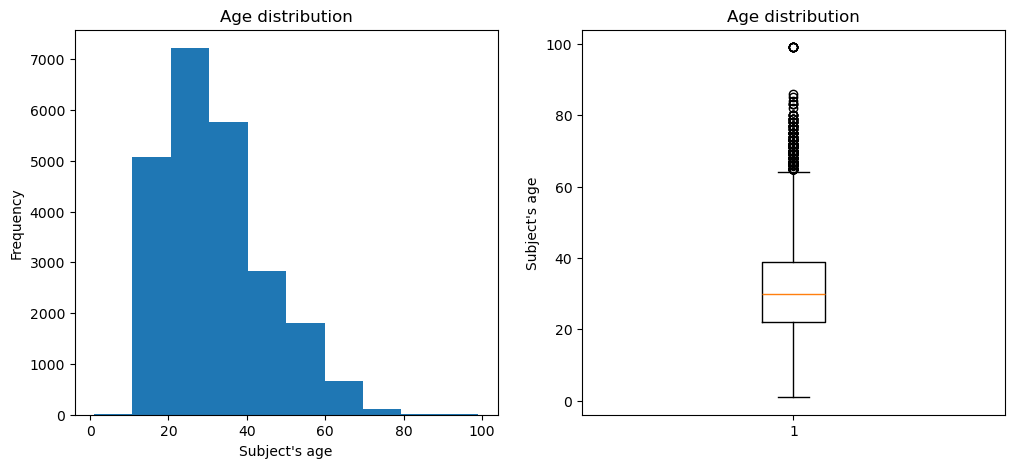

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,5))
ax = ax.flatten()

ax[0].hist(arrests['age'])
ax[0].set_xlabel("Subject's age")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Age distribution")

ax[1].boxplot(arrests['age'])
ax[1].set_ylabel("Subject's age")
ax[1].set_title("Age distribution")

plt.show()

<div class="alert alert-block alert-danger">

Subjects of age 1?

</div>

In [20]:
arrests[arrests['age']==1]

,id,race,gender,age,ethnicity,district,adjacent_to_school,division,bureau,event_date_time
5497,5498,Black/African American,Male,1,NON-HISPANIC,3.0,False,TOD,FSB,2021-12-17 01:11:00


<div class="alert alert-block alert-warning">

Subjects of age 99?

</div>

In [21]:
arrests["age"].sort_values(ascending=False).head(10)

21334    99
15903    99
2966     99
13022    99
2023     99
20261    99
6579     99
23334    99
20450    86
18119    85
Name: age, dtype: int64

In [22]:
print(f"Records over the 0.999th quantile: age {age_quantiles[.999]:0.0f}")
arrests[arrests["age"] > age_quantiles[.999]].sort_values(by='age', ascending=False)

Records over the 0.999th quantile: age 79


,id,race,gender,age,ethnicity,district,adjacent_to_school,division,bureau,event_date_time
13022,13023,Black/African American,Male,99,NON-HISPANIC,5.0,False,5D,PSB,2023-01-26 16:24:00
6579,6580,White,Male,99,HISPANIC,6.0,False,GPD,NaN,2022-02-17 00:40:00
21334,21335,Asian,Female,99,NON-HISPANIC,4.0,True,CED,FSB,2024-03-11 10:15:00
20261,20262,White,Female,99,HISPANIC,3.0,False,3D,PSB,2024-01-22 19:33:00
15903,15904,White,Male,99,NON-HISPANIC,1.0,False,RCPD,NaN,2023-06-17 12:45:00
23334,23335,Black/African American,Male,99,NON-HISPANIC,5.0,False,5D,PSB,2024-02-24 00:00:00
2966,2967,White,Female,99,NON-HISPANIC,6.0,False,6D,PSB,2021-07-26 15:32:00
2023,2024,White,Female,99,NON-HISPANIC,1.0,False,RCPD,NaN,2021-05-21 21:32:00
20450,20451,White,Male,86,NON-HISPANIC,3.0,False,3D,PSB,2024-02-01 09:59:00
18119,18120,American Indian/ALSK Natv,Male,85,NON-HISPANIC,5.0,False,5D,PSB,2023-10-08 17:02:00


#### Date and time

This column can prove very interesting, so we're going to go ahead and extract interesting information from it, that will help us with our analysis.

In [23]:
arrests["year"] = arrests["event_date_time"].dt.year
arrests["month"] = arrests["event_date_time"].dt.month
arrests["weekday"] = arrests["event_date_time"].dt.dayofweek
arrests['hour']= arrests["event_date_time"].dt.hour

In [24]:
arrests['year'].value_counts()

year
2023    7353
2022    6735
2021    5885
2024    3537
Name: count, dtype: int64

<div class="alert alert-block alert-warning">

Even though on [Kaggle](https://www.kaggle.com/datasets/shayanshahid997/police-arrest-from-2021-2023/data) described this dataset as <b>Police Arrest from 2021-2023</b> we can clearly see there are records for the year 2024.

</div>

Let's actually check the range of dates for our records:

In [25]:
print("Oldest record:", arrests['event_date_time'].min())
print("Newest record:", arrests['event_date_time'].max())

Oldest record: 2021-01-01 00:00:00
Newest record: 2024-07-01 16:23:00


In [26]:
month_names = {1: 'January',
               2: 'February',
               3: 'March',
               4: 'April',
               5: 'May',
               6: 'June',
               7: 'July',
               8: 'August',
               9: 'September',
               10: 'October',
               11: 'November',
               12: 'December'}

weekday_names = {0: 'Monday',
                 1: 'Tuesday',
                 2: 'Wednesday',
                 3: 'Thursday',
                 4: 'Friday',
                 5: 'Saturday',
                 6: 'Sunday'}

Let's plot a few histograms and barplots to get a sense of the information event_date_time can provide:

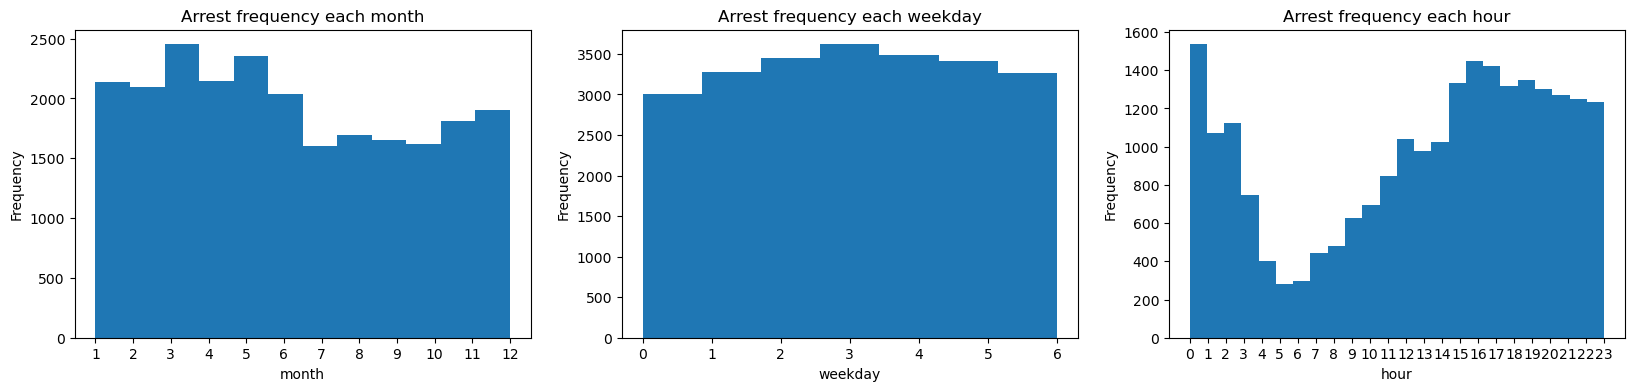

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (20,4))
ax = ax.flatten()

plots = ['month', 'weekday', 'hour']
for i, colname in enumerate(plots):

    unique_values = arrests[colname].unique()

    ax[i].hist(arrests[colname], bins = len(unique_values))

    ax[i].set_xticks(unique_values)

    ax[i].set_xlabel(colname)
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f"Arrest frequency each {colname}")

plt.show()

### Categorical variables

Our dataset is mainly made out of information about the arrested person and the arresting officer. Except for age and datetime, all of our variables are categorical. Let's look info what information these give us.

A summary of the provided information for our categorical variables:

| Column Name            | Description                                      | Field Name         | Data Type                   | Information |
| ---------------------- | ------------------------------------------------ | ------------------ | --------------------------- | ----------- |
| Subject's race | Subject's race | race | <b> categorical </b> | demographic information about the individual who was arrested. |
| Subject's gender | Subject's gender | gender | <b> categorical </b> | demographic information about the individual who was arrested. |
| Ethnicity	Subject's | ethnicity | ethnicity | <b> categorical </b> | demographic information about the individual who was arrested. |
| District of occurrence | District of occurrence | district | <b> categorical </b> | likely indicates the district in which the arrest took place. |
| Adjacent to School | Arrest occurred within 500 ft. of a school (1/0) | adjacent_to_school | <b> bool </b> | particularly interesting. It appears to indicate whether the arrest took place within 500 feet of a school, with a 1 indicating that it did and a 0 indicating that it did not. This could be useful for analyzing patterns in where arrests occur. |
| Assigned Division | District/division of officer's assignment | division  | <b> categorical </b>   | likely indicate the division of the police department that were assigned to the arrest. |
| Assigned Bureau | Bureau of officer's assignment  | bureau | <b> categorical </b>  | likely indicate the bureau of the police department that were assigned to the arrest. |

#### Subject's gender, race, and ethnicity

In [28]:
for colname in ['race', 'gender', 'ethnicity']:
    print(f"\n{colname} column:")
    print(arrests[colname].unique())


race column:
['Asian', 'Black/African American', 'White', 'Unknown', 'American Indian/ALSK Natv', 'Hawaiian/Pacific Islander']
Categories (6, object): ['American Indian/ALSK Natv', 'Asian', 'Black/African American', 'Hawaiian/Pacific Islander', 'Unknown', 'White']

gender column:
['Male', 'Female']
Categories (2, object): ['Female', 'Male']

ethnicity column:
['NON-HISPANIC', 'HISPANIC']
Categories (2, object): ['HISPANIC', 'NON-HISPANIC']


We can see one of the values in `race` is <b> Unknown </b> <br>

For the most part, these categories seem pretty straight forward.

Let's draw a few Bar plots to get a first sense of the incidence of arrests by each of these classifications.

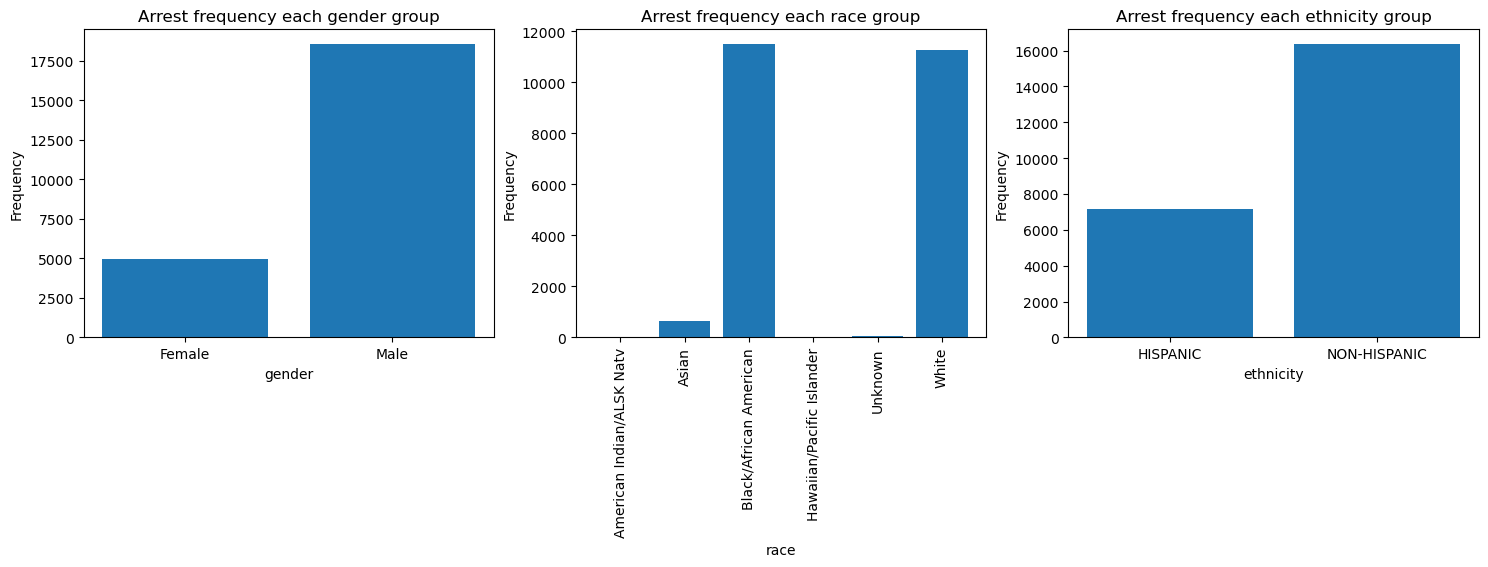

In [29]:
plots = ['gender', 'race', 'ethnicity']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
ax = ax.flatten()

for i, colname in enumerate(plots):

    group = arrests.groupby(colname).size()

    ax[i].bar(group.index, group)

    ax[i].set_xlabel(colname)
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f"Arrest frequency each {colname} group")

ax[1].tick_params(axis='x', labelrotation=90)

plt.show()


<div class="alert alert-block alert-warning">

After seeing these plots, we think it may be a good idea to get information about the race/ethnicity/gender of all the population of Montgomery County. That way we can see rates of arrests for each group, instead of just the number of arrests (if there are more White and Black/African American people than the other races, it's not very significative to show these two groups have had more arrests).

</div>

#### District of occurence

In [30]:
arrests['district'].unique()

[6.0, 1.0, 4.0, 3.0, 5.0, 2.0, 8.0, NaN]
Categories (7, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0]

We have 7 categories, numbered from 1 to 8 (skipping 7).
Let's do some research into Montgomery County's districts to see if we can gain more insight into this variable.

The [Montgomery County Council](https://www.montgomerycountymd.gov/council/district_map.html) gives a map of the district divisions in Montgomery County.

<img src="data/political-districts.jpg" width="500">

The [US Census](https://data.census.gov/map/050XX00US24031/ACSST1Y2022/S0101?layer=VT_2022_050_00_PY_D1&loc=39.1543,-77.2692,z9.7775) gives us a different map with different district subdivisions.

<img src="data/us-census-districts.jpg" width="500">

These maps don't seem to coincide with our dataset's district categories.

Upon further research, we have found this map that shows the [districts according to the Police Department](https://www.arcgis.com/apps/Viewer/index.html?appid=4317830a05654b8f907e65515970a5ba).

<img src="data/police-districts.png" width="1000">

These district do seem to coincide with our dataset. We contrasted this map with information on the [Montgomery County Police Department's website](https://www.montgomerycountymd.gov/pol/districts.html) confirming this map to be accurate. <br>
The [interactive map](https://www.montgomerycountymd.gov/pol/districts/find-my-district.html) on their website also illustrates the boundaries for each district.

<div class="alert alert-block alert-warning">

Important to note some arrests were made in the 8D District as per our dataset, but there is no MCPD Division for the 8D, possibly why their [website](https://www.montgomerycountymd.gov/pol/districts.html) doesn't list it as a district directly. <br><br>
According to the interactive map:<br>
<i>NOTE: This address is also located within the City of Takoma Park. [Click here to visit the Takoma Park Police Department webpage](https://takomaparkmd.gov/government/police/).</i>

</div>

In [31]:
arrests['district'].value_counts()

district
3.0    4782
6.0    4748
4.0    4563
5.0    3820
1.0    2513
2.0    2196
8.0     786
Name: count, dtype: int64

#### Information about the police: Bureau and Division

The description for these two columns is: <br>

<i>The Assigned Division and Assigned Bureau columns likely indicate the division and bureau of the police department that were assigned to the arrest.</i>

The values in these two columns consist of codes, which means further research is needed to understand the information about the police department assigned to the arrest.

#### Bureau

In [32]:
arrests['bureau'].unique()

['FSB', NaN, 'PSB', 'MSB', 'ISB']
Categories (4, object): ['FSB', 'ISB', 'MSB', 'PSB']

<div class="alert alert-block alert-info">

The Police Department is structured into the Office of the Chief and five major bureaus:
- the Community Resources Bureau
- the Field Services Bureau
- the Investigative Services Bureau
- the Management Services Bureau
- the Patrol Services Bureau.<br>
        The Patrol Services Bureau, the largest and most visible bureau in the Police Department, oversees most of the Department’s uniformed officers on patrol. The Patrol Services Bureau is divided into six police districts.

source: [Montgomery County Police Department](https://www.montgomerycountymd.gov/pol/bureaus/index.html)

</div>

In [33]:
bureaus = {'FSB': 'Field Services Bureau',
           'PSB': 'Patrol Services Bureau',
           'MSB': 'Management Services Bureau',
           'ISB': 'Investigative Services Bureau'}

#### Division

In [34]:
print(arrests['division'].unique())

['TOD', 'RCPD', 'TPPD', 'GPD', '4D', ..., 'CED', 'PSCC', 'FSB', 'PERS', 'ISB']
Length: 25
Categories (24, object): ['1D', '2D', '3D', '4D', ..., 'SOD', 'SVID', 'TOD', 'TPPD']


In [35]:
arrests['division'].value_counts()

division
3D      4331
4D      3908
5D      3502
GPD     2404
2D      1870
6D      1766
RCPD    1282
TOD     1033
1D       926
TPPD     782
IMTD     463
CED      361
SID      254
SVID     249
MCD       75
CID       74
MCFM      49
MCSO      19
PSTA      17
SOD        7
FSB        4
ISB        3
PERS       1
PSCC       1
Name: count, dtype: int64

We have 24 Divisions recorded in our dataset.

Each Division belongs to a specific Bureau. The information provided by the [Montgomery County Police Department](https://www.montgomerycountymd.gov/pol/bureaus/index.html) lists the following Divisions in each Bureau:

- Community Resources
    - Policy and Planning Division
- Field Services
    - Special Operations Division
    - Traffic Division
    - Security Services Division​
    - Community Engagement Division
- Investigative Services
    - Criminal Investigations Division (CID)
    - Major Crimes Division
    - Special Investigations Division (SID)
    - Special Victims Investigations Division (SVID)
    - Forensic Science Evidence Management Division (FSEMD)
    - Internal Affairs Division (IAD)
- Management Services
    - Media & Public Information Office
    - Management and Budget Division
    - Communications Division/Emergency (911) Call Center
    - Information Management Technology Division
    - Personnel Division
    - ​Training and Education Division
    - Legal and Labor Relations Division
    - Capital Projects and Facilities Division
    - Professional Accountability Division
- Patrol Services
    - District Station Units (<i>The Patrol Services Bureau is divided into [six police districts](https://www.montgomerycountymd.gov/pol/districts.html)</i>):
        - 1st District - Rockville
        - 2nd District - Bethesda
        - 3rd District - Silver Spring
        - 4th District - Wheaton
        - 5th District - Germantown
        - 6th District - Montgomery Village


By the Acronyms in this information, the names of the divisions, and further research, let's name each of our divisions:

In [36]:
fsb_divisions = {'SOD': 'Special Operations Division',
                 'TOD': 'Traffic Operations Division',
                 'CED': 'Community Engagement Division'
                 }

isb_divisions = {'CID': 'Criminal Investigations Division',
                 'MCD': 'Major Crimes Division',
                 'SID': 'Special Investigations Division',
                 'SVID': 'Special Victims Investigations Division'
                 }

msb_divisions = {'IMTD': 'Information Management and Technology Division',
                 'PSCC': 'Public Safety Communications Centre',
                 'PERS': 'Personnel Division',
                 'PSTA': 'Public Safety Training Academy'
                 }

psb_divisions = {'1D': 'District 1',
                 '2D': 'District 2',
                 '3D': 'District 3',
                 '4D': 'District 5',
                 '5D': 'District 5',
                 '6D': 'District 6'}

nobureau_divisions = {'RCPD': 'Rockville City Police Department',
                      'TPPD': 'Takoma Park Police Department',
                      'GPD': 'Gaithersburg Police Department',
                      'MCSO': 'Montgomery County Sheriff\'s Office',
                      'MCFM': 'Montgomery County Fire Marshal'}


division_names = {**fsb_divisions, **isb_divisions, **msb_divisions, **psb_divisions, **nobureau_divisions}
             

In [37]:
for division in arrests['division'].unique():
    try:
        name = division_names[division]
    except:
        name = 'UNNAMED'
    print(f"Division {division} - {name}")

Division TOD - Traffic Operations Division
Division RCPD - Rockville City Police Department
Division TPPD - Takoma Park Police Department
Division GPD - Gaithersburg Police Department
Division 4D - District 5
Division 3D - District 3
Division 5D - District 5
Division 6D - District 6
Division IMTD - Information Management and Technology Division
Division 2D - District 2
Division 1D - District 1
Division SVID - Special Victims Investigations Division
Division CID - Criminal Investigations Division
Division MCFM - Montgomery County Fire Marshal
Division SID - Special Investigations Division
Division PSTA - Public Safety Training Academy
Division nan - UNNAMED
Division MCSO - Montgomery County Sheriff's Office
Division MCD - Major Crimes Division
Division SOD - Special Operations Division
Division CED - Community Engagement Division
Division PSCC - Public Safety Communications Centre
Division FSB - UNNAMED
Division PERS - Personnel Division
Division ISB - UNNAMED


Out of the divisions that remain unnamed, we have `FSB` and `ISB`, but we know these are just bureau codes. Let's check what bureus these rows have assigned:

In [38]:
arrests[(arrests['division'] == "FSB") | (arrests['division'] == "ISB")]

,id,race,gender,age,ethnicity,district,adjacent_to_school,division,bureau,event_date_time,year,month,weekday,hour
8996,8997,Black/African American,Male,61,NON-HISPANIC,1.0,False,FSB,FSB,2022-06-21 13:24:00,2022,6,1,13
8997,8998,Black/African American,Male,61,NON-HISPANIC,1.0,False,FSB,FSB,2022-06-21 13:44:00,2022,6,1,13
11952,11953,Black/African American,Male,32,NON-HISPANIC,6.0,False,ISB,ISB,2021-03-01 00:00:00,2021,3,0,0
20256,20257,Black/African American,Male,24,NON-HISPANIC,3.0,False,FSB,FSB,2024-01-03 12:00:00,2024,1,2,12
20723,20724,Black/African American,Female,35,NON-HISPANIC,1.0,False,FSB,FSB,2024-02-13 13:30:00,2024,2,1,13
21636,21637,Black/African American,Female,36,NON-HISPANIC,3.0,False,ISB,ISB,2023-05-26 00:00:00,2023,5,4,0
21642,21643,White,Male,31,NON-HISPANIC,1.0,False,ISB,ISB,2023-09-12 00:00:00,2023,9,1,0


Indeed, the bureau corresponds to the division code. Let's change these values to something that signals there is no division assigned:

In [39]:
arrests['division'] = arrests['division'].cat.add_categories('NoDiv')
division_names['NoDiv'] = "No Specific Division Assigned"

arrests.loc[(arrests['division'] == "FSB") | (arrests['division'] == "ISB"), 'division'] = "NoDiv"

Let's take a look at how our Bureau and Divisions variables are grouped:

In [40]:
police_departments = arrests.groupby(['bureau', 'division'], dropna=False).size()
police_departments = police_departments[police_departments > 0]
police_departments

bureau  division
FSB     CED          361
        SOD            7
        TOD         1033
        NoDiv          4
ISB     CID           74
        MCD           75
        SID          254
        SVID         249
        NoDiv          3
MSB     IMTD         463
        PERS           1
        PSCC           1
        PSTA          17
PSB     1D           926
        2D          1870
        3D          4331
        4D          3908
        5D          3502
        6D          1766
        MCSO           6
nan     GPD         2404
        MCFM          49
        MCSO          13
        RCPD        1282
        TPPD         782
        nan          129
dtype: int64

It looks like all the divisions correspond to the correct Bureau (as researched), except for the MCSO (Maryland County Sheriff's Office).<br>
We also have records that show the division MCSO but have no Bureau assigned.<br>
According to our research, MCSO is not a division in any of the bureaus in the Police Department, but a separate Agency altogether.<br>
Let's make all the records with division MCSO reflect no Bureau.<br>

In [41]:
arrests.loc[arrests['division'] == 'MCSO', 'bureau'] = np.nan

In [42]:
police_departments = arrests.groupby(['bureau', 'division'], dropna=False).size()
police_departments = police_departments[police_departments > 0]
police_departments

bureau  division
FSB     CED          361
        SOD            7
        TOD         1033
        NoDiv          4
ISB     CID           74
        MCD           75
        SID          254
        SVID         249
        NoDiv          3
MSB     IMTD         463
        PERS           1
        PSCC           1
        PSTA          17
PSB     1D           926
        2D          1870
        3D          4331
        4D          3908
        5D          3502
        6D          1766
nan     GPD         2404
        MCFM          49
        MCSO          19
        RCPD        1282
        TPPD         782
        nan          129
dtype: int64

Our missing values in `Bureau` obviously correspond to Divisions that are outside the Maryland County Police Department and their bureaus. Let's create a new category in that column to idenitfy these divisions.

In [43]:
arrests['bureau'] = arrests['bureau'].cat.add_categories('notMCPD')
bureaus['notMCPD'] = "Agency Outside the Maryland County Police Department"

arrests.loc[(arrests['bureau'].isnull()) & (arrests['division'].isnull() == False), 'bureau'] = "notMCPD"

In [44]:
police_departments = arrests.groupby(['bureau', 'division'], dropna=False).size()
police_departments = police_departments[police_departments > 0]
police_departments

bureau   division
FSB      CED          361
         SOD            7
         TOD         1033
         NoDiv          4
ISB      CID           74
         MCD           75
         SID          254
         SVID         249
         NoDiv          3
MSB      IMTD         463
         PERS           1
         PSCC           1
         PSTA          17
PSB      1D           926
         2D          1870
         3D          4331
         4D          3908
         5D          3502
         6D          1766
notMCPD  GPD         2404
         MCFM          49
         MCSO          19
         RCPD        1282
         TPPD         782
nan      nan          129
dtype: int64

It looks like all the divisions correspond to the correct Bureau.

We can also see, all of the missing values in division also have no assigned bureau, and all of the records that do have assigned bureau also have assigned division.<br>
This means all of the missing values we have now, after studying these variables, are because the record does not have information regarding bureau or division.

##### District of occurance vs. PSB Division

After learning about the Patrol Services Bureau and its six divisions according to districts, we wonder what the relation is between the `District of occurance` and the division if the arrest as assigned to the Patrol Services Bureau:

In [45]:
district_vs_psbdivision = arrests[arrests['bureau'] == 'PSB'].groupby(['district', 'division'], dropna=False).size()
district_vs_psbdivision = district_vs_psbdivision[district_vs_psbdivision > 0]
district_vs_psbdivision

district  division
1.0       1D           720
          2D            23
          3D             7
          4D            22
          5D            19
          6D            30
2.0       1D            30
          2D          1787
          3D            28
          4D            26
          5D            10
          6D            18
3.0       1D            38
          2D            11
          3D          4177
          4D            43
          5D            15
          6D            15
4.0       1D            41
          2D            13
          3D            67
          4D          3776
          5D            22
          6D            14
5.0       1D            16
          2D             5
          3D            13
          4D             8
          5D          3363
          6D            58
6.0       1D            80
          2D             9
          3D             9
          4D            16
          5D            62
          6D          1625
8.0      

It seems regardless of the District of occurance, there's arrests made by all of the divisions in the Patrol Services Bureau

## Revisiting the missing values

After having found some of the causes for missing values, and corrected them, let's revisit our Missing value count and see what we have right now:

In [46]:
arrests.isnull().sum()

id                      0
race                    0
gender                  0
age                     0
ethnicity               0
district              102
adjacent_to_school      0
division              129
bureau                129
event_date_time         0
year                    0
month                   0
weekday                 0
hour                    0
dtype: int64

We still have some missing values in our division and district columns.

In [47]:
print(f"Percentage of missingnes for each column:\n{round((arrests.isnull().sum() / nb_records)*100, 2)}")

Percentage of missingnes for each column:
id                    0.00
race                  0.00
gender                0.00
age                   0.00
ethnicity             0.00
district              0.43
adjacent_to_school    0.00
division              0.55
bureau                0.55
event_date_time       0.00
year                  0.00
month                 0.00
weekday               0.00
hour                  0.00
dtype: float64


<b> Missing values in Division and Bureau</b><br>
As explained before, these are records with no information in regards to assigned bureau or assigned division.<br>
We have confirmed that all of the records with missing values for division are also the records with missing values for bureau.<br>

Seeing as the percentage of missingness is very small (less than 1%), we can ignore these missing values and leave them in our dataset.<br>
When plotting by Bureau, Division, or District of occurance, we will ignore these records.

# Additional data: Demographic information (Age, Gender, Race and Ethnicity)

We thought it'd be useful to look at some census data for the county of Maryland, to be able to analyse comparatively and correctly assess wether or not there is bias in regards to people's demographics.
- [Decennial Census from 2020](https://data.census.gov/table/DECENNIALDP2020.DP1?g=050XX00US24031&d=DEC%20Demographic%20Profile)
- [American Community Survey - 1-Year Estimates (2022)](https://data.census.gov/table/ACSDP1Y2022.DP05?g=050XX00US24031)
- [American Community Survey - 1-Year Estimates (2021)](https://data.census.gov/table/ACSDP1Y2021.DP05?g=050XX00US24031)

### The Decennial Census from 2020

In [48]:
decennial = pd.read_csv("data/us-census-data/decennial-census-2020/DECENNIALDP2020.DP1-2024-08-02T232057.csv")

In [49]:
print(decennial.shape)
decennial.head(20)

(174, 3)


,Label (Grouping),"Montgomery County, Maryland!!Count","Montgomery County, Maryland!!Percent"
0,SEX AND AGE,NaN,NaN
1,Total population,"1,062,061",100.0%
2,Under 5 years,"59,726",5.6%
3,5 to 9 years,"66,704",6.3%
4,10 to 14 years,"72,492",6.8%
5,15 to 19 years,"67,985",6.4%
6,20 to 24 years,"61,027",5.7%
7,25 to 29 years,"64,492",6.1%
8,30 to 34 years,"71,010",6.7%
9,35 to 39 years,"74,903",7.1%


<div class="alert alert-block alert-danger">

<b>We have to be careful with these datasets.</b><br>
After exploring the website for the US census (where this data was pulled from) we can see there are <b>rows with totals</b> for certain groups that <b>have subgroups</b>, and they're in rows immediately after.<br><br> This means <i>not every row is one record</i>, some of them are totals for a certain slice of other rows.

</div>

In [50]:
print(decennial['Label (Grouping)'].unique())

['SEX AND AGE' '\xa0\xa0\xa0\xa0Total population'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Under 5 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa05 to 9 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa010 to 14 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa015 to 19 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa020 to 24 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa025 to 29 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa030 to 34 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa035 to 39 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa040 to 44 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa045 to 49 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa050 to 54 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa055 to 59 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa060 to 64 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa065 to 69 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa070 to 74 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa075 to 79 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa080 to 84 years'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa085 years and over'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Selected Age Cat

From taking a look at the `Label (Grouping)` column, we can see there are special characters before each string, most likely indicating the level on the hierarchy of the dataset. Let's try to discriminate based on this.

In [51]:
decennial['hierarchy'] = decennial['Label (Grouping)'].str.count('\xa0')
decennial['hierarchy'].unique()

array([ 0,  4,  8, 12, 16])

Let's look at each of the list of values for the top hierarchy:

In [52]:
decennial.loc[decennial['hierarchy'] == 0, 'Label (Grouping)']

0                     SEX AND AGE
76              MEDIAN AGE BY SEX
80                           RACE
90        TOTAL RACES TALLIED [1]
98             HISPANIC OR LATINO
102    HISPANIC OR LATINO BY RACE
120                  RELATIONSHIP
141            HOUSEHOLDS BY TYPE
157             HOUSING OCCUPANCY
167                 VACANCY RATES
170                HOUSING TENURE
Name: Label (Grouping), dtype: object

These are the main groupings in the dataset. We're only interested in the categories that relate to our dataset: `SEX AND AGE`, `RACE` and `HISPANIC OR LATINO`<br>

Let's extract this information from `decennial`.

### Extracting information from the US Census datasets

<i><b>Since we will need to extract information from two other datasets (estimates for 2021 and 2022), we'll try to define all of our steps as functions that we can extrapolate to the other two datasets.</i></b>

##### Column types

<div class="alert alert-block alert-warning">

Before we can go ahead with that, we need to check wether or not we have the correct data types to work with:

</div>

In [53]:
decennial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Label (Grouping)                      174 non-null    object
 1   Montgomery County, Maryland!!Count    160 non-null    object
 2   Montgomery County, Maryland!!Percent  160 non-null    object
 3   hierarchy                             174 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.6+ KB


In [54]:
decennial.head()

,Label (Grouping),"Montgomery County, Maryland!!Count","Montgomery County, Maryland!!Percent",hierarchy
0,SEX AND AGE,NaN,NaN,0
1,Total population,"1,062,061",100.0%,4
2,Under 5 years,"59,726",5.6%,8
3,5 to 9 years,"66,704",6.3%,8
4,10 to 14 years,"72,492",6.8%,8


In the Count column (number of people) we have missing values and numbers stored as strings, with thousands separators. Let's fix that so we have a column of type `int`

In [55]:
def fix_population_count_column(column):
    new_col = column.fillna("-1")
    new_col.loc[new_col.str.contains('X')] = '-1'
    new_col.loc[new_col.str.contains('N')] = '-1'

    new_col = new_col.str.split(',')
    new_col = new_col.apply(lambda l: "".join(l))
    new_col.loc[new_col == '-1'] = np.nan
    return new_col.astype('float')

In [56]:
decennial['population_count'] = fix_population_count_column(decennial['Montgomery County, Maryland!!Count'])
decennial[['Montgomery County, Maryland!!Count', 'population_count']]

,"Montgomery County, Maryland!!Count",population_count
0,NaN,NaN
1,"1,062,061",1062061.0
2,"59,726",59726.0
3,"66,704",66704.0
4,"72,492",72492.0
...,...,...
169,5.5,5.5
170,NaN,NaN
171,"386,931",386931.0
172,"246,421",246421.0


Now let's do something similar with the percentages column.

In [57]:
def fix_population_percentage_column(column):
    
    new_col = column.fillna("-1")
    new_col.loc[new_col.str.contains('X')] = '-1'
    new_col.loc[new_col.str.contains('N')] = '-1'
    new_col.loc[new_col.str.contains(',')] = '-1'
    
    new_col.loc[new_col.str.contains('%')] = new_col.loc[new_col.str.contains('%')].apply(lambda x: x[:-1])
    new_col.loc[new_col == '-1'] = np.nan
    return new_col.astype('float')

In [58]:
#decennial['population_percentage'] = fix_population_percentage_column(decennial['Montgomery County, Maryland!!Percent'])
#decennial[['Montgomery County, Maryland!!Percent', 'population_percentage']]

In [59]:
decennial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Label (Grouping)                      174 non-null    object 
 1   Montgomery County, Maryland!!Count    160 non-null    object 
 2   Montgomery County, Maryland!!Percent  160 non-null    object 
 3   hierarchy                             174 non-null    int64  
 4   population_count                      160 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.9+ KB


In [60]:
decennial['Label (Grouping)'] = decennial['Label (Grouping)'].apply(lambda string: string.replace(u'\xa0', u''))

#### Total population

First, we'll save the total population in a variable so as to not have to include it in our new dataset.

In [61]:
decennial.loc[decennial['Label (Grouping)'].str.contains('Total population'), ['Label (Grouping)', 'population_count']]

,Label (Grouping),population_count
1,Total population,1062061.0
81,Total population,1062061.0
99,Total population,1062061.0
103,Total population,1062061.0
121,Total population,1062061.0


In [62]:
def extract_total_population(dataset, labels_column):
    index_record_with_total = dataset.loc[dataset[labels_column].str.contains('Total population'), labels_column].index[0]
    return dataset.loc[index_record_with_total, 'population_count']

In [63]:
decennial_total = extract_total_population(decennial, 'Label (Grouping)')
decennial_total

1062061.0

#### Extracting the population counts for each demographic category

In [64]:
decennial.loc[decennial['hierarchy'] == 0, 'Label (Grouping)']

0                     SEX AND AGE
76              MEDIAN AGE BY SEX
80                           RACE
90        TOTAL RACES TALLIED [1]
98             HISPANIC OR LATINO
102    HISPANIC OR LATINO BY RACE
120                  RELATIONSHIP
141            HOUSEHOLDS BY TYPE
157             HOUSING OCCUPANCY
167                 VACANCY RATES
170                HOUSING TENURE
Name: Label (Grouping), dtype: object

We're only interested in the categories that relate to our dataset: `SEX AND AGE`, `RACE` and `HISPANIC OR LATINO`<br>
Let's define new dataframes with this information.

In [65]:
def extract_to_new_dfs(dataset, labels_column, groups_of_interest):

    groups_of_interest_indices = []
    groups_first_rows = dataset.loc[dataset['hierarchy'] == 0, labels_column]
    groups_first_rows = groups_first_rows.reset_index()
    
    k = 0
    i = 0
    while i < len(groups_first_rows) and k<len(groups_of_interest):
        if groups_of_interest[k] in groups_first_rows.loc[i, labels_column]:

            # we sum 2 to avoid the row with the group name and to avoid the row with the total population (since it appears every time)
            groups_of_interest_indices.append([groups_first_rows.loc[i, 'index'], groups_first_rows.loc[i+1, 'index']])

            k += 1
        i += 1

    
    return groups_of_interest_indices
    

In [66]:
groups_of_interest = ['SEX AND AGE', 'RACE', 'HISPANIC OR LATINO']

sex_age_indices, race_indices, ethnicity_indices = extract_to_new_dfs(decennial, 'Label (Grouping)', groups_of_interest)

In [67]:
#decennial = decennial[['Label (Grouping)', 'hierarchy', 'population_count', 'population_percentage']]
decennial = decennial[['Label (Grouping)', 'hierarchy', 'population_count']]

# we sum 2 to the start indexto avoid the row with the group name and to avoid the row with the total population (since it appears every time)
decennial_sex_age = decennial.loc[sex_age_indices[0]+2:sex_age_indices[1], :]
decennial_race = decennial.loc[race_indices[0]+2:race_indices[1], :]
decennial_ethnicity = decennial.loc[ethnicity_indices[0]+2:ethnicity_indices[1], :]

Now we have three new dataframes with only the data we are interested in. Let's check wether or not that data is exactly what we need.

##### Sex

In [68]:
decennial_sex_age.loc[(decennial_sex_age['Label (Grouping)'].str.contains('Male')) | (decennial_sex_age['Label (Grouping)'].str.contains('Female')), :]

,Label (Grouping),hierarchy,population_count
26,Male population,4,509117.0
51,Female population,4,552944.0


Let's create a function to obtain just the sex data from the decennial_age_sex dataset:

In [69]:
def sex_df(dataset):
    return dataset[dataset['hierarchy'] == 4]

In [70]:
decennial_sex = sex_df(decennial_sex_age)

##### Age

Let's take a peek at the dataset to try and locate our data:

In [71]:
decennial_sex_age.head(20)

,Label (Grouping),hierarchy,population_count
2,Under 5 years,8,59726.0
3,5 to 9 years,8,66704.0
4,10 to 14 years,8,72492.0
5,15 to 19 years,8,67985.0
6,20 to 24 years,8,61027.0
7,25 to 29 years,8,64492.0
8,30 to 34 years,8,71010.0
9,35 to 39 years,8,74903.0
10,40 to 44 years,8,71909.0
11,45 to 49 years,8,70756.0


We're only interested in the basic categories from Under 5 years to 85 years and over.

In [72]:
def age_df(dataset, labels_column):
    start = dataset.loc[dataset[labels_column].str.contains('Under 5 years'), labels_column].index
    if len(start)>1:
        start = start[0]

    end = dataset.loc[dataset[labels_column].str.contains('85 years and over'), labels_column].index
    if len(end)>1:
        end = end[0]

    return dataset[start: end+1]

In [73]:
decennial_age = age_df(decennial, 'Label (Grouping)')

##### Race

In [74]:
decennial_race

,Label (Grouping),hierarchy,population_count
82,One Race,8,942799.0
83,White,12,457783.0
84,Black or African American,12,197077.0
85,American Indian and Alaska Native,12,7036.0
86,Asian,12,163507.0
87,Native Hawaiian and Other Pacific Islander,12,610.0
88,Some Other Race,12,116786.0
89,Two or More Races,8,119262.0
90,TOTAL RACES TALLIED [1],0,NaN


We're only interested in the values under the grouping `One Race` since that is what our arrests dataset records. (1 single race per person).<br>
There records are all the records with hierarchy 12.

In [75]:
def race_df(dataset):
    return dataset[dataset['hierarchy'] == 12]

In [76]:
decennial_race = race_df(decennial_race)

##### Ethnicity

In [77]:
decennial_ethnicity

,Label (Grouping),hierarchy,population_count
100,Hispanic or Latino (of any race),8,217409.0
101,Not Hispanic or Latino,8,844652.0
102,HISPANIC OR LATINO BY RACE,0,NaN


Same as before, let's just keep records with hierarchy 8.

In [78]:
def ethnicity_df(dataset):
    return dataset[dataset['hierarchy'] == 8]

In [79]:
decennial_ethnicity = ethnicity_df(decennial_ethnicity)

## The estimates

In [80]:
estimate_21 = pd.read_csv("data/us-census-data/estimates-21-22/ACSDP1Y2021.DP05-2024-08-02T230200.csv")
estimate_22 = pd.read_csv("data/us-census-data/estimates-21-22/ACSDP1Y2022.DP05-2024-08-02T230152.csv")

In [81]:
print(estimate_21.shape)
estimate_21.head()

(94, 5)


,Label (Grouping),"Montgomery County, Maryland!!Estimate","Montgomery County, Maryland!!Margin of Error","Montgomery County, Maryland!!Percent","Montgomery County, Maryland!!Percent Margin of Error"
0,SEX AND AGE,NaN,NaN,NaN,NaN
1,Total population,"1,054,827",*****,"1,054,827",(X)
2,Male,"513,427",±241,48.7%,±0.1
3,Female,"541,400",±241,51.3%,±0.1
4,Sex ratio (males per 100 females),94.8,±0.1,(X),(X)


In [82]:
print(estimate_22.shape)
estimate_22.head()

(96, 5)


,Label (Grouping),"Montgomery County, Maryland!!Estimate","Montgomery County, Maryland!!Margin of Error","Montgomery County, Maryland!!Percent","Montgomery County, Maryland!!Percent Margin of Error"
0,SEX AND AGE,NaN,NaN,NaN,NaN
1,Total population,"1,052,521",*****,"1,052,521",(X)
2,Male,"513,200",±335,48.8%,±0.1
3,Female,"539,321",±335,51.2%,±0.1
4,Sex ratio (males per 100 females),95.2,±0.1,(X),(X)


<i>(We'll go ahead and dismiss the margins of error, we're not going to be as detailed as to provide the margin of error for each category. We'll simply be careful to always refer to them as estimates, and to refer to the original US Census data for information about the margins of error of these estimates.)</i>


### Estimate for 2021

In [83]:
estimate_21['hierarchy'] = estimate_21['Label (Grouping)'].str.count('\xa0')
estimate_21['hierarchy'].unique()

array([ 0,  4,  8, 12, 16])

In [84]:
estimate_21['population_count'] = fix_population_count_column(estimate_21['Montgomery County, Maryland!!Estimate'])
#estimate_21['population_percentage'] = fix_population_percentage_column(estimate_21['Montgomery County, Maryland!!Percent'])
estimate_21_total = extract_total_population(estimate_21, 'Label (Grouping)')

In [85]:
estimate_21['Label (Grouping)'] = estimate_21['Label (Grouping)'].apply(lambda string: string.replace(u'\xa0', u''))

In [86]:
estimate_21.loc[estimate_21['hierarchy'] == 0, 'Label (Grouping)']

0                                           SEX AND AGE
33                                                 RACE
64    Race alone or in combination with one or more ...
72                          HISPANIC OR LATINO AND RACE
89                                  Total housing units
90                       CITIZEN, VOTING AGE POPULATION
Name: Label (Grouping), dtype: object

In [87]:
groups_of_interest = ['SEX AND AGE', 'RACE', 'HISPANIC OR LATINO AND RACE']

sex_age_indices, race_indices, ethnicity_indices = extract_to_new_dfs(estimate_21, 'Label (Grouping)', groups_of_interest)
#estimate_21 = estimate_21[['Label (Grouping)', 'hierarchy', 'population_count', 'population_percentage']]
estimate_21 = estimate_21[['Label (Grouping)', 'hierarchy', 'population_count']]

# we sum 2 to the start index to avoid the row with the group name and to avoid the row with the total population (since it appears every time)
estimate_21_sex_age = estimate_21.loc[sex_age_indices[0]+2:sex_age_indices[1], :]
estimate_21_race = estimate_21.loc[race_indices[0]+2:race_indices[1], :]
estimate_21_ethnicity = estimate_21.loc[ethnicity_indices[0]+2:ethnicity_indices[1], :]

In [88]:
estimate_21_sex = estimate_21[2:4]
estimate_21_age = estimate_21[5:18]
estimate_21_race = estimate_21.iloc[38:59]
estimate_21_race = estimate_21_race[estimate_21_race['hierarchy'] == 12]
estimate_21_ethnicity = estimate_21_ethnicity[estimate_21_ethnicity['hierarchy'] == 8]

### Estimate for 2022

In [89]:
estimate_22['hierarchy'] = estimate_22['Label (Grouping)'].str.count('\xa0')
estimate_22['hierarchy'].unique()

array([ 0,  4,  8, 12, 16])

In [90]:
estimate_22['population_count'] = fix_population_count_column(estimate_22['Montgomery County, Maryland!!Estimate'])
#estimate_22['population_percentage'] = fix_population_percentage_column(estimate_22['Montgomery County, Maryland!!Percent'])
estimate_22_total = extract_total_population(estimate_22, 'Label (Grouping)')

In [91]:
estimate_22['Label (Grouping)'] = estimate_22['Label (Grouping)'].apply(lambda string: string.replace(u'\xa0', u''))

In [92]:
estimate_22.loc[estimate_22['hierarchy'] == 0, 'Label (Grouping)']

0                                           SEX AND AGE
33                                                 RACE
66    Race alone or in combination with one or more ...
74                          HISPANIC OR LATINO AND RACE
91                                  Total housing units
92                       CITIZEN, VOTING AGE POPULATION
Name: Label (Grouping), dtype: object

In [93]:
groups_of_interest = ['SEX AND AGE', 'RACE', 'HISPANIC OR LATINO AND RACE']

sex_age_indices, race_indices, ethnicity_indices = extract_to_new_dfs(estimate_22, 'Label (Grouping)', groups_of_interest)
#estimate_22 = estimate_22[['Label (Grouping)', 'hierarchy', 'population_count', 'population_percentage']]
estimate_22 = estimate_22[['Label (Grouping)', 'hierarchy', 'population_count']]

# we sum 2 to avoid the row with the group name and to avoid the row with the total population (since it appears every time)
estimate_22_sex_age = estimate_22.loc[sex_age_indices[0]+2:sex_age_indices[1], :]
estimate_22_race = estimate_22.loc[race_indices[0]+2:race_indices[1], :]
# we don't sum 2 here since this one is different
estimate_22_ethnicity = estimate_22.loc[ethnicity_indices[0]:ethnicity_indices[1], :]

In [94]:
estimate_22_sex = estimate_22[2:4]
estimate_22_age = estimate_22[5:18]
estimate_22_race = estimate_22[38:59]
estimate_22_race = estimate_22_race[estimate_22_race['hierarchy'] == 12]
estimate_22_ethnicity = estimate_22_ethnicity[estimate_22_ethnicity['hierarchy'] == 8]

### Polishing up the dataframes for demographic information

The resulting dataframes are as follows:

In [95]:
print(decennial_total)
display(decennial_sex, decennial_age, decennial_race, decennial_ethnicity)

1062061.0


,Label (Grouping),hierarchy,population_count
26,Male population,4,509117.0
51,Female population,4,552944.0


,Label (Grouping),hierarchy,population_count
2,Under 5 years,8,59726.0
3,5 to 9 years,8,66704.0
4,10 to 14 years,8,72492.0
5,15 to 19 years,8,67985.0
6,20 to 24 years,8,61027.0
7,25 to 29 years,8,64492.0
8,30 to 34 years,8,71010.0
9,35 to 39 years,8,74903.0
10,40 to 44 years,8,71909.0
11,45 to 49 years,8,70756.0


,Label (Grouping),hierarchy,population_count
83,White,12,457783.0
84,Black or African American,12,197077.0
85,American Indian and Alaska Native,12,7036.0
86,Asian,12,163507.0
87,Native Hawaiian and Other Pacific Islander,12,610.0
88,Some Other Race,12,116786.0


,Label (Grouping),hierarchy,population_count
100,Hispanic or Latino (of any race),8,217409.0
101,Not Hispanic or Latino,8,844652.0


In [96]:
print(estimate_21_total)
display(estimate_21_sex, estimate_21_age, estimate_21_race, estimate_21_ethnicity)

1054827.0


,Label (Grouping),hierarchy,population_count
2,Male,8,513427.0
3,Female,8,541400.0


,Label (Grouping),hierarchy,population_count
5,Under 5 years,8,60997.0
6,5 to 9 years,8,64875.0
7,10 to 14 years,8,72184.0
8,15 to 19 years,8,66083.0
9,20 to 24 years,8,58029.0
10,25 to 34 years,8,127604.0
11,35 to 44 years,8,147207.0
12,45 to 54 years,8,143226.0
13,55 to 59 years,8,69640.0
14,60 to 64 years,8,70040.0


,Label (Grouping),hierarchy,population_count
38,White,12,444151.0
39,Black or African American,12,198493.0
40,American Indian and Alaska Native,12,5410.0
45,Asian,12,164340.0
53,Native Hawaiian and Other Pacific Islander,12,0.0
58,Some other race,12,130625.0


,Label (Grouping),hierarchy,population_count
74,Hispanic or Latino (of any race),8,211512.0
79,Not Hispanic or Latino,8,843315.0


In [97]:
print(estimate_22_total)
display(estimate_22_sex, estimate_22_age, estimate_22_race, estimate_22_ethnicity)

1052521.0


,Label (Grouping),hierarchy,population_count
2,Male,8,513200.0
3,Female,8,539321.0


,Label (Grouping),hierarchy,population_count
5,Under 5 years,8,59728.0
6,5 to 9 years,8,67753.0
7,10 to 14 years,8,66527.0
8,15 to 19 years,8,65522.0
9,20 to 24 years,8,61333.0
10,25 to 34 years,8,124896.0
11,35 to 44 years,8,146635.0
12,45 to 54 years,8,141721.0
13,55 to 59 years,8,71499.0
14,60 to 64 years,8,65573.0


,Label (Grouping),hierarchy,population_count
38,White,12,444783.0
39,Black or African American,12,194776.0
40,American Indian and Alaska Native,12,5561.0
45,Asian,12,161770.0
53,Native Hawaiian and Other Pacific Islander,12,260.0
58,Some Other Race,12,131129.0


,Label (Grouping),hierarchy,population_count
76,Hispanic or Latino (of any race),8,213926.0
81,Not Hispanic or Latino,8,838595.0


To polish up our dataframes, let's reset the index, make sure all of the categories have the same string for names, and erase the hierarchy columns since we don't need them anymore.

In [98]:
def polish(dataframe, added):
    new_dataframe = dataframe.reset_index()
    new_dataframe = new_dataframe.drop(columns=['index', 'hierarchy'])
    print(list(dataframe['Label (Grouping)']))
    new_dataframe = new_dataframe.rename(columns={'Label (Grouping)': 'label',
                                                  'population_count': 'population_count_' + added})
#                                                  'population_percentage': 'population_percentage_' + added})
    new_dataframe = new_dataframe.set_index('label')
    return new_dataframe

In [99]:
decennial_age = polish(decennial_age, '2020')
decennial_sex = polish(decennial_sex, '2020')
decennial_race = polish(decennial_race, '2020')
decennial_ethnicity = polish(decennial_ethnicity, '2020')
estimate_21_age = polish(estimate_21_age, '2021')
estimate_21_sex = polish(estimate_21_sex, '2021')
estimate_21_race = polish(estimate_21_race, '2021')
estimate_21_ethnicity = polish(estimate_21_ethnicity, '2021')
estimate_22_age = polish(estimate_22_age, '2022')
estimate_22_sex = polish(estimate_22_sex, '2022')
estimate_22_race = polish(estimate_22_race, '2022')
estimate_22_ethnicity = polish(estimate_22_ethnicity, '2022')

['Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over']
['Male population', 'Female population']
['White', 'Black or African American', 'American Indian and Alaska Native', 'Asian', 'Native Hawaiian and Other Pacific Islander', 'Some Other Race']
['Hispanic or Latino (of any race)', 'Not Hispanic or Latino']
['Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 to 84 years', '85 years and over']
['Male', 'Female']
['White', 'Black or African American', 'American Indian and Alaska Native', 'Asian', 'Native Hawaiian and Other Pacific Islander', 'Some other race']
['Hispanic or Lat

In [100]:
decennial_sex.reset_index(inplace=True)

decennial_sex.loc[0, 'label'] = 'Male'
decennial_sex.loc[1, 'label'] = 'Female'

decennial_sex.set_index('label', inplace=True)

decennial_sex

,population_count_2020
label,
Male,509117.0
Female,552944.0


In [101]:
estimate_21_race.reset_index(inplace=True)

estimate_21_race.loc[5, 'label'] = 'Some Other Race'

estimate_21_race.set_index('label', inplace=True)

All of the dataframes look okay! We have demographic information for the whole county of Montgomery ready to plot against our dataset.

# Our target variables

In [102]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  23510 non-null  int64         
 1   race                23510 non-null  category      
 2   gender              23510 non-null  category      
 3   age                 23510 non-null  int64         
 4   ethnicity           23510 non-null  category      
 5   district            23408 non-null  category      
 6   adjacent_to_school  23510 non-null  bool          
 7   division            23381 non-null  category      
 8   bureau              23381 non-null  category      
 9   event_date_time     23510 non-null  datetime64[ns]
 10  year                23510 non-null  int32         
 11  month               23510 non-null  int32         
 12  weekday             23510 non-null  int32         
 13  hour                23510 non-null  int32     

# Visualizations

## Arrests based on demographic information

The goal here is to find out wether or not the rate of arrests for a specific group of poeple was higher compared to the other groups for each of our demographic categories.

We can only use the arrests for the years 2021 and 2022, since we only have US Census information (estimates) for those two years.

| Demographic Category | Our dataset (2021-07/2024) | Decennial Census (2020) | 1 year estimate (2021 and 2022) |
| -- | -- | -- | -- |
| Age | Number of arrests, their date and time, District of occurence, Bureau and Division that made the arrest | Total population | Estimated population |
| Gender/Sex | Number of arrests, their date and time, District of occurence, Bureau and Division that made the arrest | Total population | Estimated population |
| Race | Number of arrests, their date and time, District of occurence, District of occurence, Bureau and Division that made the arrest | Total population | Estimated population |
| Ethnicity | Number of arrests, their date and time, District of occurence, Bureau and Division that made the arrest | Total population | Estimated population |

<div class="alert alert-block alert-danger">

<b><i>Gender and sex are NOT the same thing.</b></i> <br>
Despite this fact, we will treat the category Gender from our dataset with the category Sex from the census, since the `Gender` column in our dataset only refers to <b>Male</b> and <b>Female</b>.

</div>

In [103]:
total_arrests_by_year = arrests.groupby('year').size()
total_arrests_by_year

year
2021    5885
2022    6735
2023    7353
2024    3537
dtype: int64

We will go ahead and only compare the data for the year 2022.

### Preparing the data

#### Age

First, we need to create a new column in our dataframe with the intervals of ages the US Census uses, to be able to compare it accurately.

In [104]:
age_divisions_census = ['Under 5 years',
                        '5 to 9 years', '10 to 14 years',
                        '15 to 19 years', '20 to 24 years',
                        '25 to 34 years',
                        '35 to 44 years',
                        '45 to 54 years',
                        '55 to 59 years', '60 to 64 years',
                        '65 to 74 years',
                        '75 to 84 years',
                        '85 years and over']

bins = [0, 4, 9, 14, 19, 24, 34, 44, 54, 59, 64, 74, 84, 99]

arrests['age_interval'] = pd.cut(arrests['age'], bins, labels = age_divisions_census)

Now we can calculate the rate of arrests for 2021 and 2022 by age interval.

In [105]:
arrests_age_2021 = arrests[arrests['year']==2021].groupby('age_interval').size()

arrests_age_2022 = arrests[arrests['year']==2022].groupby('age_interval').size()

Let's add all of our information into a new dataframe

In [106]:
age_rate_21 = estimate_21_age.copy()
age_rate_21['population_percentage_2021'] = age_rate_21['population_count_2021']/estimate_21_total*100
age_rate_21['nb_of_arrests_2021'] = arrests_age_2021
age_rate_21['percentage_of_arrests_2021'] = age_rate_21['nb_of_arrests_2021']/total_arrests_by_year[2021]*100

age_rate_22 = estimate_22_age.copy()
age_rate_22['population_percentage_2022'] = age_rate_22['population_count_2022']/estimate_22_total*100
age_rate_22['nb_of_arrests_2022'] = arrests_age_2022
age_rate_22['percentage_of_arrests_2022'] = age_rate_22['nb_of_arrests_2022']/total_arrests_by_year[2022]*100

Let's calculate the arrest rate (Arrest rate per 1,000 individuals.)

In [107]:
age_rate_21['rate_2021'] = age_rate_21['nb_of_arrests_2021']/age_rate_21['population_count_2021']*1000

age_rate_22['rate_2022'] = age_rate_22['nb_of_arrests_2022']/age_rate_22['population_count_2022']*1000


#### Sex

In [108]:
display(estimate_21_sex.index, estimate_22_sex.index)
print(arrests['gender'].unique())

Index(['Male', 'Female'], dtype='object', name='label')

Index(['Male', 'Female'], dtype='object', name='label')

['Male', 'Female']
Categories (2, object): ['Female', 'Male']


Our category names coincide for all records, which means we can go ahead and compare all the data.

Now we can calculate the rate of arrests for 2021 and 2022 by sex.

In [109]:
arrests_sex_2021 = arrests[arrests['year']==2021].groupby('gender').size()

arrests_sex_2022 = arrests[arrests['year']==2022].groupby('gender').size()

Let's add all of our information into a new dataframe

In [110]:
sex_rate_21 = estimate_21_sex.copy()
sex_rate_21['population_percentage_2021'] = sex_rate_21['population_count_2021']/estimate_21_total*100
sex_rate_21['nb_of_arrests_2021'] = arrests_sex_2021
sex_rate_21['percentage_of_arrests_2021'] = sex_rate_21['nb_of_arrests_2021']/total_arrests_by_year[2021]*100

sex_rate_22 = estimate_22_sex.copy()
sex_rate_22['population_percentage_2022'] = sex_rate_22['population_count_2022']/estimate_22_total*100
sex_rate_22['nb_of_arrests_2022'] = arrests_sex_2022
sex_rate_22['percentage_of_arrests_2022'] = sex_rate_22['nb_of_arrests_2022']/total_arrests_by_year[2022]*100

Let's calculate the arrest rater (Arrest rate per 1,000 individuals.)

In [111]:
sex_rate_21['rate_2021'] = sex_rate_21['nb_of_arrests_2021']/sex_rate_21['population_count_2021']*1000

sex_rate_22['rate_2022'] = sex_rate_22['nb_of_arrests_2022']/sex_rate_22['population_count_2022']*1000


In [112]:
display(sex_rate_22)

,population_count_2022,population_percentage_2022,nb_of_arrests_2022,percentage_of_arrests_2022,rate_2022
label,,,,,
Male,513200.0,48.759122,5362,79.613957,10.448168
Female,539321.0,51.240878,1373,20.386043,2.545794


#### Race

In [113]:
display(estimate_21_race.index, estimate_22_race.index)
print(arrests['race'].unique())

Index(['White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Some Other Race'],
      dtype='object', name='label')

Index(['White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Some Other Race'],
      dtype='object', name='label')

['Asian', 'Black/African American', 'White', 'Unknown', 'American Indian/ALSK Natv', 'Hawaiian/Pacific Islander']
Categories (6, object): ['American Indian/ALSK Natv', 'Asian', 'Black/African American', 'Hawaiian/Pacific Islander', 'Unknown', 'White']


We need to rename the labels in the estimate dataframes to be able to accurately merge the data.

In [114]:
estimate_21_race = estimate_21_race.reset_index()
estimate_21_race['index'] = ['White', 'Black/African American', 'American Indian/ALSK Natv', 'Asian', 'Hawaiian/Pacific Islander', 'Unknown']
estimate_21_race = estimate_21_race.set_index('index')

estimate_22_race = estimate_22_race.reset_index()
estimate_22_race['index'] = ['White', 'Black/African American', 'American Indian/ALSK Natv', 'Asian', 'Hawaiian/Pacific Islander', 'Unknown']
estimate_22_race = estimate_22_race.set_index('index')

Now we can calculate the rate of arrests for 2021 and 2022 by age interval.

In [115]:
arrests_race_2021 = arrests[arrests['year']==2021].groupby('race').size()

arrests_race_2022 = arrests[arrests['year']==2022].groupby('race').size()

Let's add all of our information into a new dataframe

In [116]:
race_rate_21 = estimate_21_race.copy()
race_rate_21['population_percentage_2021'] = race_rate_21['population_count_2021']/estimate_21_total*100
race_rate_21['nb_of_arrests_2021'] = arrests_race_2021
race_rate_21['percentage_of_arrests_2021'] = race_rate_21['nb_of_arrests_2021']/total_arrests_by_year[2021]*100

race_rate_22 = estimate_22_race.copy()
race_rate_22['population_percentage_2022'] = race_rate_22['population_count_2022']/estimate_22_total*100
race_rate_22['nb_of_arrests_2022'] = arrests_race_2022
race_rate_22['percentage_of_arrests_2022'] = race_rate_22['nb_of_arrests_2022']/total_arrests_by_year[2022]*100

Let's calculate the arrest rater (Arrest rate per 1,000 individuals.)

In [117]:
race_rate_21['rate_2021'] = race_rate_21['nb_of_arrests_2021']/race_rate_21['population_count_2021']*1000

race_rate_22['rate_2022'] = race_rate_22['nb_of_arrests_2022']/race_rate_22['population_count_2022']*1000


In [118]:
race_rate_21.loc['Hawaiian/Pacific Islander', 'rate_2021'] = 0

#### Ethnicity

In [119]:
display(estimate_21_ethnicity.index, estimate_22_ethnicity.index)
print(arrests['ethnicity'].unique())

Index(['Hispanic or Latino (of any race)', 'Not Hispanic or Latino'], dtype='object', name='label')

Index(['Hispanic or Latino (of any race)', 'Not Hispanic or Latino'], dtype='object', name='label')

['NON-HISPANIC', 'HISPANIC']
Categories (2, object): ['HISPANIC', 'NON-HISPANIC']


We need to rename the labels in the estimate dataframes to be able to accurately merge the data.

In [120]:
estimate_21_ethnicity = estimate_21_ethnicity.reset_index()
estimate_21_ethnicity['index'] = ['HISPANIC', 'NON-HISPANIC']
estimate_21_ethnicity = estimate_21_ethnicity.set_index('index')

estimate_22_ethnicity = estimate_22_ethnicity.reset_index()
estimate_22_ethnicity['index'] = ['HISPANIC', 'NON-HISPANIC']
estimate_22_ethnicity = estimate_22_ethnicity.set_index('index')

Now we can calculate the rate of arrests for 2021 and 2022 by ethnicity.

In [121]:
arrests_ethnicity_2021 = arrests[arrests['year']==2021].groupby('ethnicity').size()

arrests_ethnicity_2022 = arrests[arrests['year']==2022].groupby('ethnicity').size()

Let's add all of our information into a new dataframe

In [122]:
ethnicity_rate_21 = estimate_21_ethnicity.copy()
ethnicity_rate_21['population_percentage_2021'] = ethnicity_rate_21['population_count_2021']/estimate_21_total*100
ethnicity_rate_21['nb_of_arrests_2021'] = arrests_ethnicity_2021
ethnicity_rate_21['percentage_of_arrests_2021'] = ethnicity_rate_21['nb_of_arrests_2021']/total_arrests_by_year[2021]*100

ethnicity_rate_22 = estimate_22_ethnicity.copy()
ethnicity_rate_22['population_percentage_2022'] = ethnicity_rate_22['population_count_2022']/estimate_22_total*100
ethnicity_rate_22['nb_of_arrests_2022'] = arrests_ethnicity_2022
ethnicity_rate_22['percentage_of_arrests_2022'] = ethnicity_rate_22['nb_of_arrests_2022']/total_arrests_by_year[2022]*100

Let's calculate the arrest rater (Arrest rate per 1,000 individuals.)

In [123]:
ethnicity_rate_21['rate_2021'] = ethnicity_rate_21['nb_of_arrests_2021']/ethnicity_rate_21['population_count_2021']*1000

ethnicity_rate_22['rate_2022'] = ethnicity_rate_22['nb_of_arrests_2022']/ethnicity_rate_22['population_count_2022']*1000


In [124]:
display(ethnicity_rate_21, ethnicity_rate_22)

,label,population_count_2021,population_percentage_2021,nb_of_arrests_2021,percentage_of_arrests_2021,rate_2021
index,,,,,,
HISPANIC,Hispanic or Latino (of any race),211512.0,20.051819,1646,27.969414,7.782064
NON-HISPANIC,Not Hispanic or Latino,843315.0,79.948181,4239,72.030586,5.026591


,label,population_count_2022,population_percentage_2022,nb_of_arrests_2022,percentage_of_arrests_2022,rate_2022
index,,,,,,
HISPANIC,Hispanic or Latino (of any race),213926.0,20.325105,2003,29.740163,9.363051
NON-HISPANIC,Not Hispanic or Latino,838595.0,79.674895,4732,70.259837,5.642772


### Percentage of the population vs. percentage of the arrests.

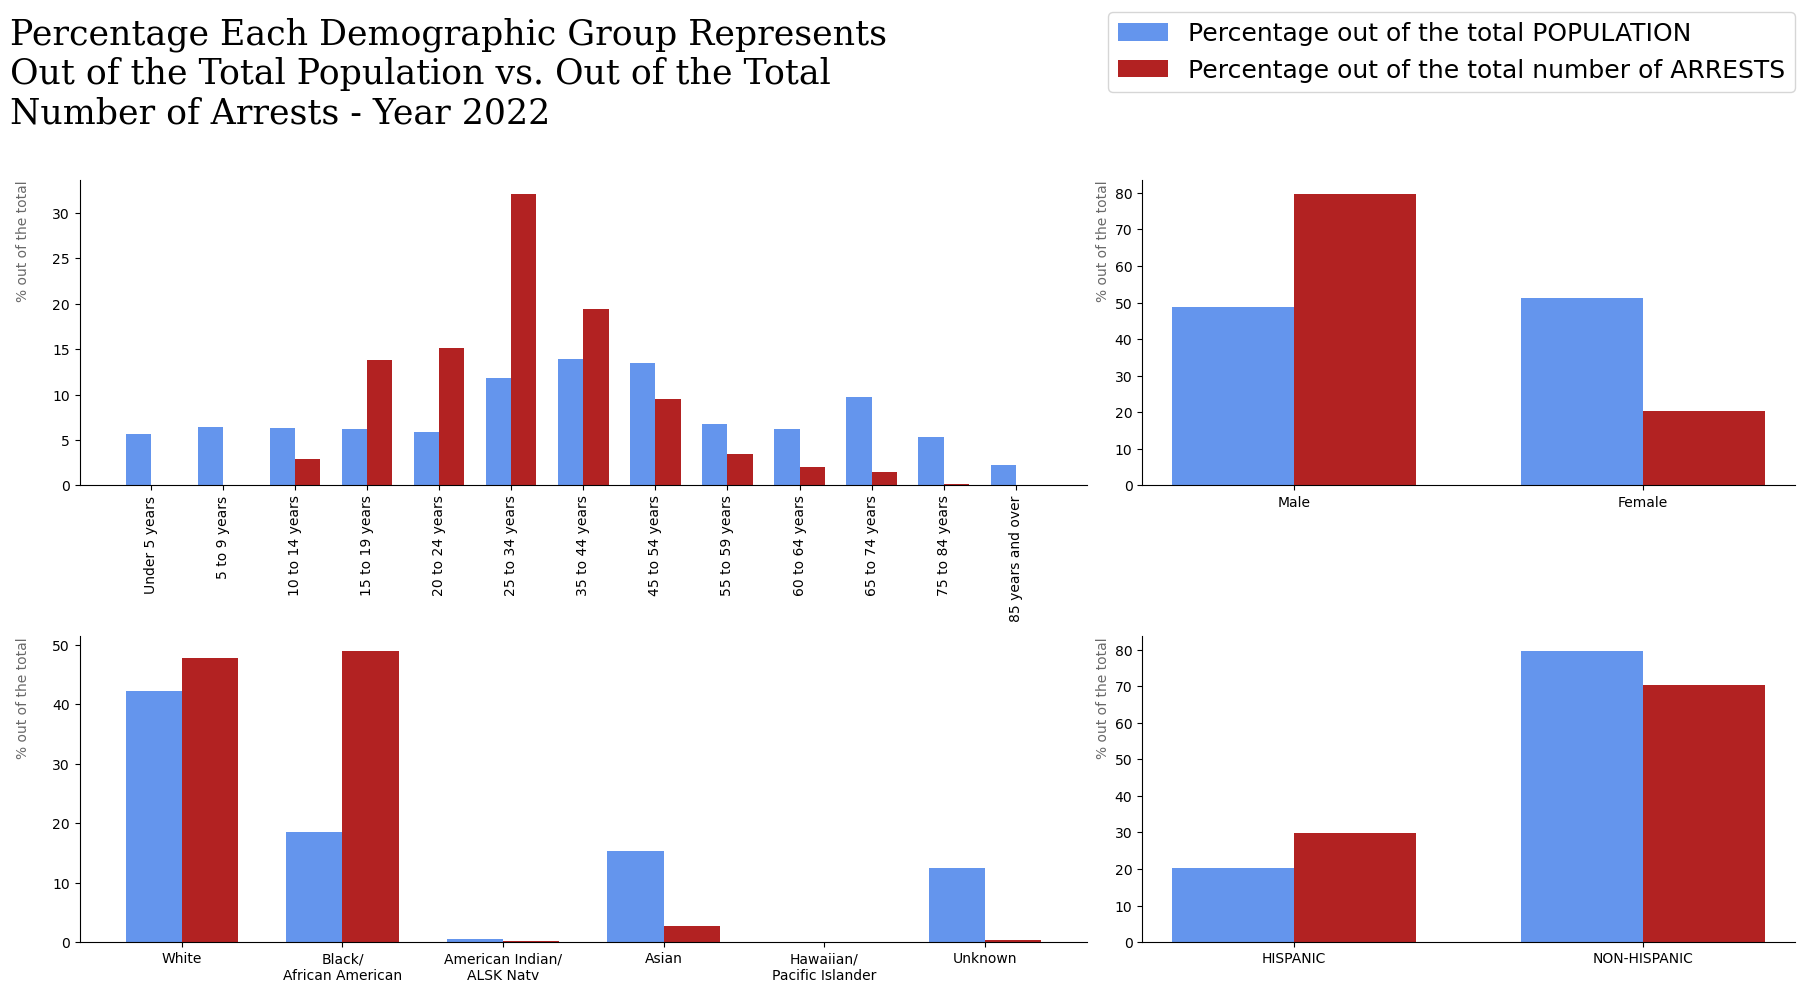

In [201]:
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(nrows=2, ncols=5)

ax11 = fig.add_subplot(gs[0, :3])
ax12 = fig.add_subplot(gs[0, 3:])
ax21 = fig.add_subplot(gs[1, :3])
ax22 = fig.add_subplot(gs[1, 3:])

ax = [ax11, ax12, ax21, ax22]

datasets = [age_rate_22, sex_rate_22, race_rate_22, ethnicity_rate_22]

pop_percents = [np.array(list(age_rate_22['population_percentage_2022'])),
                np.array(list(sex_rate_22['population_percentage_2022'])),
                np.array(list(race_rate_22['population_percentage_2022'])),
                np.array(list(ethnicity_rate_22['population_percentage_2022']))]

arrest_percents = [np.array(list(age_rate_22['percentage_of_arrests_2022'])),
                   np.array(list(sex_rate_22['percentage_of_arrests_2022'])),
                   np.array(list(race_rate_22['percentage_of_arrests_2022'])),
                   np.array(list(ethnicity_rate_22['percentage_of_arrests_2022']))]

colors = ['cornflowerblue', 'firebrick']

for i in range (4):

    dataset = datasets[i]

    pop_percent = np.array(list(dataset['population_percentage_2022']))
    arrest_percent = np.array(list(dataset['percentage_of_arrests_2022']))

    x = np.arange(1,len(pop_percent)+1)

    w = .35 # Use 35% of each slot (day of week) per bar, leaving 30% for spacing

    l1 = ax[i].bar(x-w/2, pop_percent,     width=w, color=colors[0], label="Percentage out of the total population")
    l2 = ax[i].bar(x+w/2, arrest_percent,  width=w, color=colors[1], label="Percentage out of the total number of arrests")

    ax[i].set_xticks(x)
    if i==2:
        xlabels = list(dataset.index)
        for j in [1,2,4]:
            xlabels[j] = "/\n".join(xlabels[j].split("/"))
            ax[i].set_xticklabels(xlabels)
    else:
        ax[i].set_xticklabels(dataset.index)

    ax[i].set_ylabel("% out of the total", horizontalalignment='right', color='dimgray')
    ax[i].yaxis.set_label_coords(-0.05, 1)

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)


fig.suptitle(f"Percentage Each Demographic Group Represents\nOut of the Total Population vs. Out of the Total\nNumber of Arrests - Year 2022\n",
             font='serif', size=25, x=0, horizontalalignment='left')
ax[0].tick_params(axis='x', labelrotation=90)

labels = ["Percentage out of the total POPULATION", "Percentage out of the total number of ARRESTS"] 
fig.legend([l1, l2], labels=labels, loc="upper right", fontsize=18) 

plt.tight_layout()
plt.show()

### Arrest rates for each demographic category

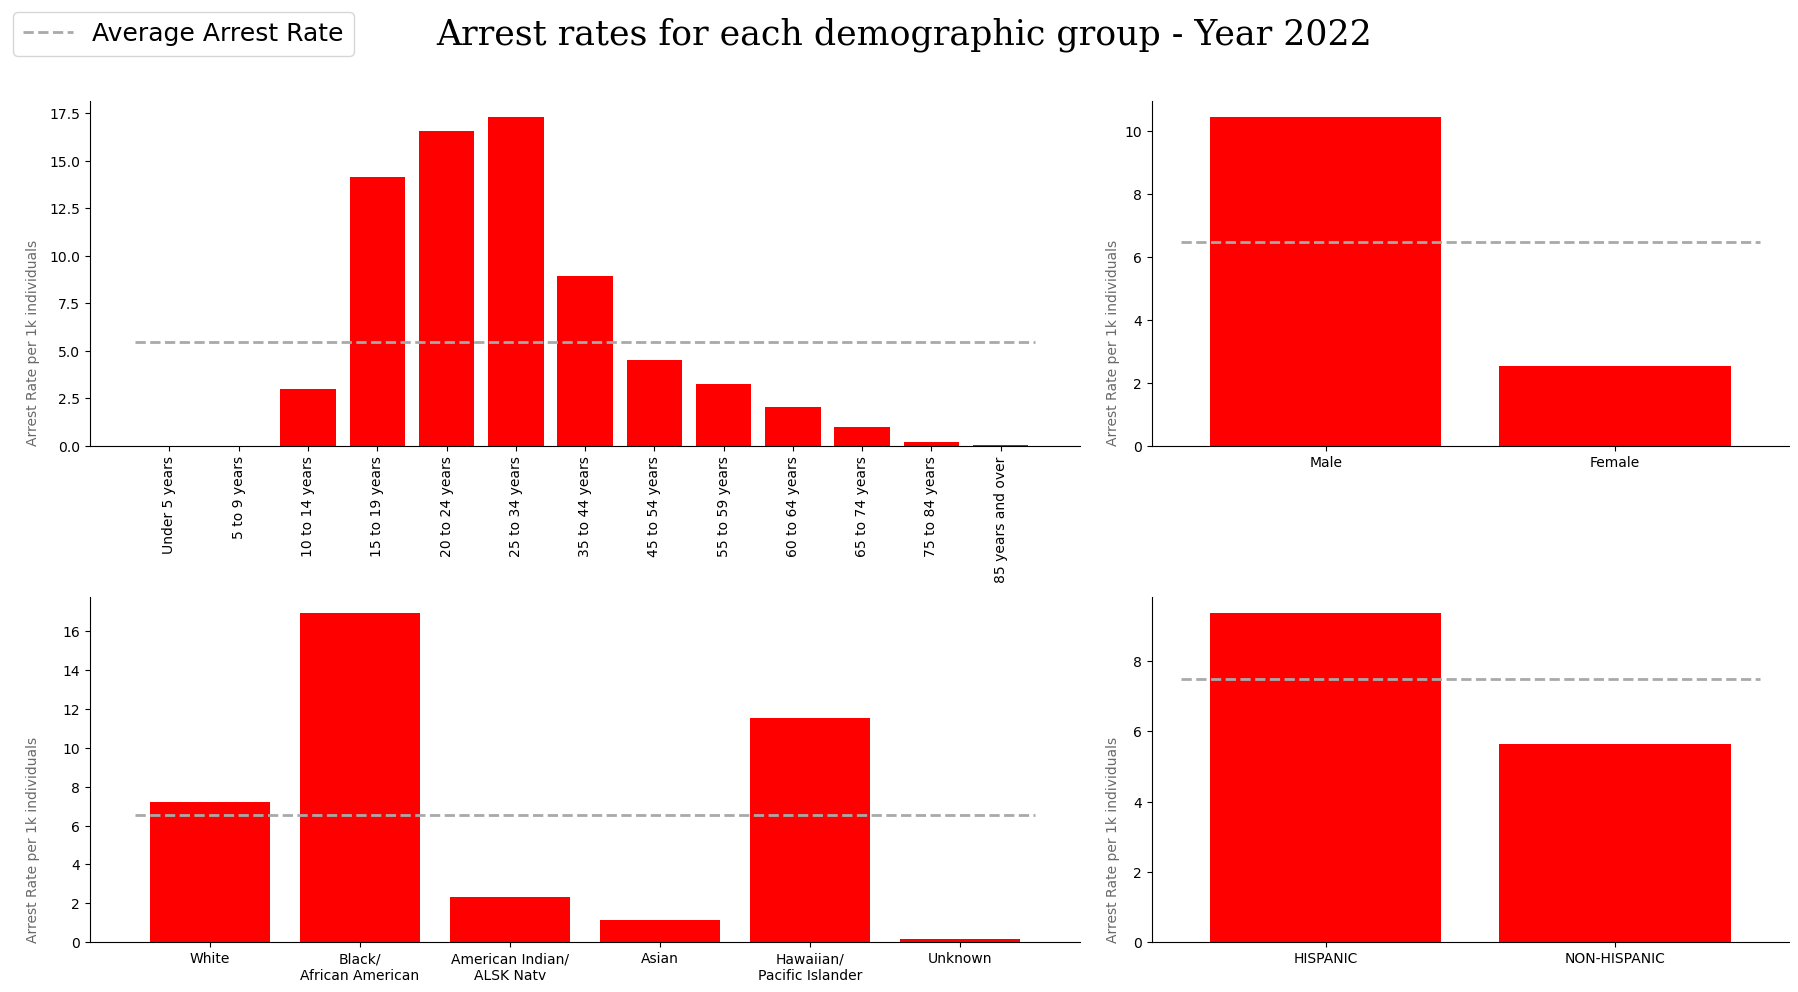

In [203]:
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(nrows=2, ncols=5)

ax11 = fig.add_subplot(gs[0, :3])
ax12 = fig.add_subplot(gs[0, 3:])
ax21 = fig.add_subplot(gs[1, :3])
ax22 = fig.add_subplot(gs[1, 3:])

ax = [ax11, ax12, ax21, ax22]

datasets = [age_rate_22, sex_rate_22, race_rate_22, ethnicity_rate_22]

for i in range(4):

    dataset = datasets[i]

    # Plotting the arrest rates
    ax[i].bar(dataset.index, dataset['rate_2022'], color='red')

    ax[i].set_ylabel("\nArrest Rate per 1k individuals", horizontalalignment='left', color='dimgray')
    ax[i].yaxis.set_label_coords(-0.05, 0)

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

    #Add horizontal line to indicate mean arrest rate
    h1 = ax[i].hlines(y=dataset['rate_2022'].mean(), xmin=-0.5, xmax=len(dataset.index)-0.5,
                colors='darkgray', linestyles='dashed', lw=2, label='Average Arrest Rate')

    #ax[i].legend(loc='upper right')

fig.suptitle(f"Arrest rates for each demographic group - Year 2022\n",
             font='serif', size=25)
ax[0].tick_params(axis='x', labelrotation=90)

xlabels = list(race_rate_22.index)
for j in [1,2,4]:
    xlabels[j] = "/\n".join(xlabels[j].split("/"))
    ax[2].set_xticklabels(xlabels)

fig.legend(h1, labels=['Average Arrest Rate'], loc='upper left', fontsize=18) 

plt.tight_layout()
plt.show()

## Percentage of arrests in each group by Police division

Let's make a pivot table for sex, race and ethnicity grouped by police bureau.

In [ ]:
sex_bureau = pd.pivot_table(arrests, values='id', index=['bureau'], columns=['gender'], aggfunc="count", margins=True)
race_bureau = pd.pivot_table(arrests, values='id', index=['bureau'], columns=['race'], aggfunc="count", margins=True)
ethnicity_bureau = pd.pivot_table(arrests, values='id', index=['bureau'], columns=['ethnicity'], aggfunc="count", margins=True)

In [ ]:
print(list(sex_bureau.columns))
print(list(race_bureau.columns))
print(list(ethnicity_bureau.columns))

['Female', 'Male', 'All']
['American Indian/ALSK Natv', 'Asian', 'Black/African American', 'Hawaiian/Pacific Islander', 'Unknown', 'White', 'All']
['HISPANIC', 'NON-HISPANIC', 'All']


Let's add the percentages.

In [ ]:
def add_percentages(dataset):
    for colname in dataset:
        if colname != "All":
            dataset["% " + colname] = dataset[colname]/dataset['All']*100
        dataset.drop(columns=colname, inplace=True)
    dataset.drop(index='All', inplace=True)

In [ ]:
add_percentages(sex_bureau)
add_percentages(race_bureau)
add_percentages(ethnicity_bureau)

Now let's calculate the distribution of age for each police bureau.

In [ ]:
distribution_of_age_by_bureau = []
bureaus = sorted(list(arrests['bureau'].dropna().unique()))

for bureau in bureaus:
    distribution_of_age_by_bureau.append(arrests[arrests['bureau'] == bureau]['age'].values)

Let's draw the stacked barplots to show the percentages:

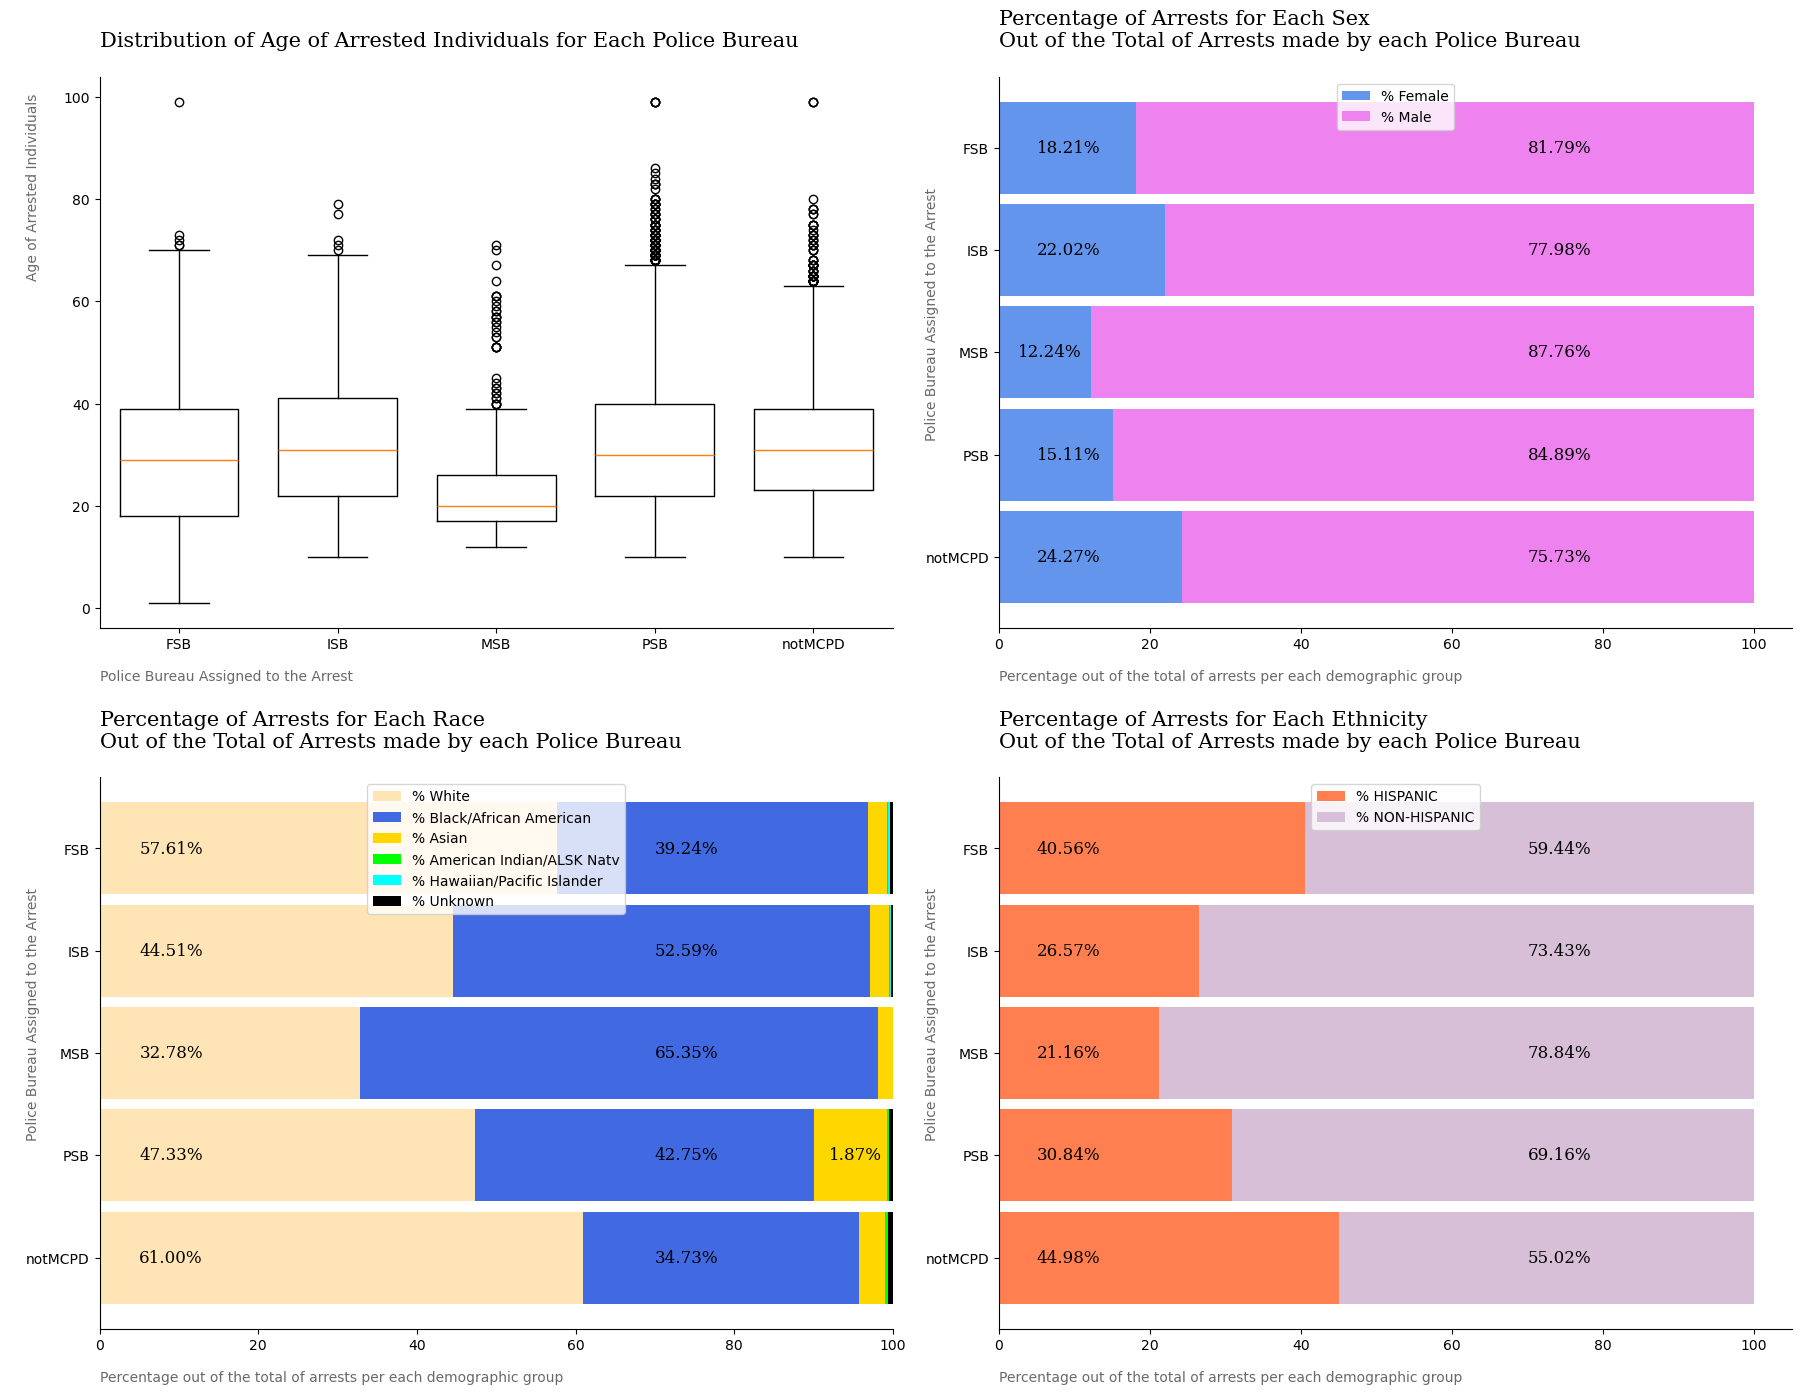

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,14))
ax = ax.flatten()

# BOXPLOT for age distribution by bureau ----------------------------------------------

ax[0].boxplot(distribution_of_age_by_bureau, widths=0.75)

ax[0].set_xticks(np.arange(1,len(bureaus)+1))
ax[0].set_xticklabels(bureaus)

ax[0].set_ylabel("Age of Arrested Individuals", color='dimgray')
ax[0].set_xlabel("Police Bureau Assigned to the Arrest\n", color='dimgray', horizontalalignment='left')
ax[0].set_title(f"Distribution of Age of Arrested Individuals for Each Police Bureau\n",
            loc='left', font='serif', size=15)

ax[0].xaxis.set_label_coords(0.0, -0.075)
ax[0].yaxis.set_label_coords(-0.075, 0.8)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# -------------------------------------------------------------------------------------
# Stacked horizontal barplots for % of arrests per demographic group by bureau --------

datasets = [sex_bureau, race_bureau, ethnicity_bureau]

columns = [['% Female', '% Male'],
           ['% White', '% Black/African American', '% Asian', '% American Indian/ALSK Natv', '% Hawaiian/Pacific Islander', '% Unknown'],
           ['% HISPANIC', '% NON-HISPANIC']]

color_schemes = {'Sex': ['cornflowerblue', 'violet'],
                 'Race': ['moccasin', 'royalblue', 'gold', 'lime', 'cyan', 'black'],
                 'Ethnicity': ['coral', 'thistle']}

bureaus_reversed = bureaus[::-1].copy()

titles = ['Sex', 'Race', 'Ethnicity']

value_labels_locs = [5, 70]

for i in range(3):

    dataset = datasets[i]

    series = []
    bottom = 0
    for j, colname in enumerate(columns[i]):
        values = np.array(list(dataset[colname]))
        ax[i+1].barh(bureaus_reversed, values,  left = bottom, height=0.9, label=colname, color=color_schemes[titles[i]][j])
        bottom = bottom + values

        if j==0 or j==1:
            for k, bureau in enumerate(bureaus_reversed):
                if titles[i] == 'Sex' and bureau == 'MSB' and j==0:
                    ax[i+1].text(2.5, bureau, f"{values[k]:0.2f}%",
                             verticalalignment='center', size=12, font='serif')
                else:
                    ax[i+1].text(value_labels_locs[j], bureau, f"{values[k]:0.2f}%",
                                verticalalignment='center', size=12, font='serif')
        elif j==2 and titles[i] == 'Race':
            ax[i+1].text(92, 'PSB', f"{values[2]:0.2f}%",
                         verticalalignment='center', size=12, font='serif')
        
    ax[i+1].legend(loc='upper center')

    ax[i+1].set_yticks(bureaus_reversed)
    ax[i+1].set_yticklabels(bureaus_reversed)

    ax[i+1].set_ylabel("\nPolice Bureau Assigned to the Arrest", color='dimgray', horizontalalignment='right')
    ax[i+1].set_xlabel("Percentage out of the total of arrests per each demographic group", color='dimgray', horizontalalignment='left')

    ax[i+1].xaxis.set_label_coords(0.0, -0.075)
    ax[i+1].yaxis.set_label_coords(-0.075, 0.8)

    ax[i+1].set_title(f"Percentage of Arrests for Each {titles[i]}\nOut of the Total of Arrests made by each Police Bureau\n",
                      loc='left', font='serif', size=15)

    ax[i+1].spines['top'].set_visible(False)
    ax[i+1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Adjacent to school per each district

In [ ]:
district_vs_school = pd.pivot_table(arrests, values='id', index=['district'], columns=['adjacent_to_school'], aggfunc="count", margins=True)

In [ ]:
district_vs_school

adjacent_to_school,False,True,All
district,,,
1.0,2256,257,2513
2.0,1944,252,2196
3.0,4324,458,4782
4.0,4268,295,4563
5.0,3591,229,3820
6.0,4353,395,4748
8.0,672,114,786
All,21408,2000,23408


In [ ]:
def convert_to_percentages(dataset):
    for colname in dataset:
        if colname != "All":
            dataset["% " + str(colname)] = dataset[colname]/dataset['All']*100
        dataset.drop(columns=colname, inplace=True)
    dataset.drop(index='All', inplace=True)

In [ ]:
convert_to_percentages(district_vs_school)

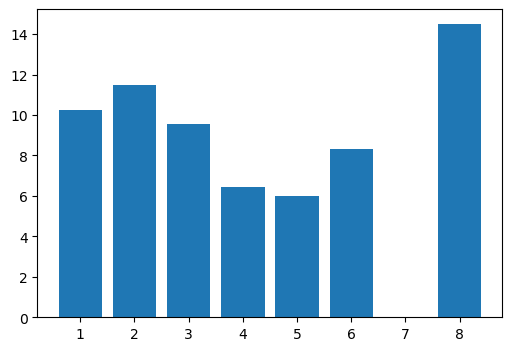

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

ax.bar(district_vs_school.index, district_vs_school['% True'])
plt.show()

<div class="alert alert-block alert-danger">

***CONVERT THIS TO HEATMAP USING THE MAP OF MONTGOMERY?***

</div>